# Project Intro

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# Data Set

You have been provided 4 individual data sets. Time period of data is from 02/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

* Cab_Data.csv:  this file includes details of transaction for 2 cab companies.

* Customer_ID.csv:  this is a mapping table that contains a unique identifier which links the customer’s demographic details.

* Transaction_ID.csv: this is a mapping table that contains transaction to customer mapping and payment mode.

* City.csv: this file contains list of US cities, their population and number of cab users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import scikitplot as skplt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [187]:
cab_df = pd.read_csv('/Users/amirshahcheraghian/Desktop/Desktop Folders/PHD UQAR/Python Codes/Data Glacier/DataSets-main/Cab_Data.csv')
cab_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [3]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

So, there are no missing value in this Dataset

In [4]:
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

The Date of Travel is of serial number format. So we change the format of Date.

In [5]:
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'])

In [6]:
cab_df.head()

Transaction ID                Date of Travel   Company        City  \
0        10000011 1970-01-01 00:00:00.000042377  Pink Cab  ATLANTA GA   
1        10000012 1970-01-01 00:00:00.000042375  Pink Cab  ATLANTA GA   
2        10000013 1970-01-01 00:00:00.000042371  Pink Cab  ATLANTA GA   
3        10000014 1970-01-01 00:00:00.000042376  Pink Cab  ATLANTA GA   
4        10000015 1970-01-01 00:00:00.000042372  Pink Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip  
0         30.45         370.95       313.635  
1         28.62         358.52       334.854  
2          9.04         125.20        97.632  
3         33.17         377.40       351.602  
4          8.73         114.62        97.776

In [188]:
#import city dataset 
city_df = pd.read_csv('/Users/amirshahcheraghian/Desktop/Desktop Folders/PHD UQAR/Python Codes/Data Glacier/DataSets-main/City.csv')
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [8]:
city_df.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [9]:
#cheking if the Cities in city_df are in cab_df 
np.setdiff1d(city_df.City , cab_df.City)

array(['SAN FRANCISCO CA'], dtype=object)

So, The San Fransicso is not in cab_df dataset

In [189]:
#import transaction ID dataset 
trans_df = pd.read_csv('/Users/amirshahcheraghian/Desktop/Desktop Folders/PHD UQAR/Python Codes/Data Glacier/DataSets-main/Transaction_ID.csv')
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [11]:
trans_df.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [12]:
#cheking if the transaction ID in trans_df are in cab_df 

len(np.setdiff1d(trans_df['Transaction ID'], cab_df['Transaction ID']))

80706

There are about 80,706 transaction ID's not present in the df1 dataset. These will be dropped when joining trans_df with the df1 dataset

In [13]:
#Make new Dataframe and assign the 'Transaction ID' column to the cab_df

df1 = pd.merge(cab_df , trans_df , on = 'Transaction ID')
df1.head()

Transaction ID                Date of Travel   Company        City  \
0        10000011 1970-01-01 00:00:00.000042377  Pink Cab  ATLANTA GA   
1        10000012 1970-01-01 00:00:00.000042375  Pink Cab  ATLANTA GA   
2        10000013 1970-01-01 00:00:00.000042371  Pink Cab  ATLANTA GA   
3        10000014 1970-01-01 00:00:00.000042376  Pink Cab  ATLANTA GA   
4        10000015 1970-01-01 00:00:00.000042372  Pink Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         30.45         370.95       313.635        29290         Card  
1         28.62         358.52       334.854        27703         Card  
2          9.04         125.20        97.632        28712         Cash  
3         33.17         377.40       351.602        28020         Cash  
4          8.73         114.62        97.776        27182         Card

In [190]:
#import Customer ID dataset 
cust_df = pd.read_csv('/Users/amirshahcheraghian/Desktop/Desktop Folders/PHD UQAR/Python Codes/Data Glacier/DataSets-main/Customer_ID.csv')
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
cust_df.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [16]:
len(np.setdiff1d(cust_df['Customer ID'], df1['Customer ID']))

3023

In [17]:
full_df = pd.merge(df1, cust_df, on = 'Customer ID')
full_df.head()

Transaction ID                Date of Travel     Company        City  \
0        10000011 1970-01-01 00:00:00.000042377    Pink Cab  ATLANTA GA   
1        10351127 1970-01-01 00:00:00.000043302  Yellow Cab  ATLANTA GA   
2        10412921 1970-01-01 00:00:00.000043427  Yellow Cab  ATLANTA GA   
3        10000012 1970-01-01 00:00:00.000042375    Pink Cab  ATLANTA GA   
4        10320494 1970-01-01 00:00:00.000043211  Yellow Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
0         30.45         370.95      313.6350        29290         Card   Male   
1         26.19         598.70      317.4228        29290         Cash   Male   
2         42.55         792.05      597.4020        29290         Card   Male   
3         28.62         358.52      334.8540        27703         Card   Male   
4         36.38         721.10      467.1192        27703         Card   Male   

   Age  Income (USD/Month)  
0   28               10813  
1   28               10813  
2   28               10813  
3   27                9237  
4   27                9237

In [18]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [19]:
full_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

<span class="mark">We have joined all datasets and created a master dataset comprising of columns from all of the datasets.</span>

In [21]:
%%time
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(full_df)):
    if full_df.City[i].split()[~0] in US_States:
        city.append(full_df.City[i].split(f' {full_df.City[i].split()[~0]}')[0])
        state.append(full_df.City[i].split()[~0])
    else:
        city.append(full_df.City[i])
        state.append(np.nan)


CPU times: user 7.64 s, sys: 15.3 ms, total: 7.65 s
Wall time: 7.65 s


In [22]:
full_df['City'] = city
full_df['State'] = state

full_df.head()

Transaction ID                Date of Travel     Company     City  \
0        10000011 1970-01-01 00:00:00.000042377    Pink Cab  ATLANTA   
1        10351127 1970-01-01 00:00:00.000043302  Yellow Cab  ATLANTA   
2        10412921 1970-01-01 00:00:00.000043427  Yellow Cab  ATLANTA   
3        10000012 1970-01-01 00:00:00.000042375    Pink Cab  ATLANTA   
4        10320494 1970-01-01 00:00:00.000043211  Yellow Cab  ATLANTA   

   KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
0         30.45         370.95      313.6350        29290         Card   Male   
1         26.19         598.70      317.4228        29290         Cash   Male   
2         42.55         792.05      597.4020        29290         Card   Male   
3         28.62         358.52      334.8540        27703         Card   Male   
4         36.38         721.10      467.1192        27703         Card   Male   

   Age  Income (USD/Month) State  
0   28               10813    GA  
1   28               10813    GA  
2   28               10813    GA  
3   27                9237    GA  
4   27                9237    GA

In [23]:
print(full_df.City.unique())
print()
print(full_df.State.unique())

['ATLANTA' 'AUSTIN' 'BOSTON' 'CHICAGO' 'DALLAS' 'DENVER' 'LOS ANGELES'
 'MIAMI' 'NASHVILLE' 'NEW YORK' 'ORANGE COUNTY' 'PHOENIX' 'PITTSBURGH'
 'SACRAMENTO' 'SAN DIEGO' 'SEATTLE' 'SILICON VALLEY' 'TUCSON' 'WASHINGTON']

['GA' 'TX' 'MA' 'IL' 'CO' 'CA' 'FL' 'TN' 'NY' nan 'AZ' 'PA' 'WA' 'DC']


In [24]:
full_df.isnull().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
State                 12501
dtype: int64

In [25]:
full_df.State.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388     True
359389    False
359390    False
359391    False
Name: State, Length: 359392, dtype: bool

In [26]:
full_df[full_df.State.isna()]

Transaction ID                Date of Travel     Company  \
2436          10000157 1970-01-01 00:00:00.000042372    Pink Cab   
2437          10394767 1970-01-01 00:00:00.000043391  Yellow Cab   
2438          10000158 1970-01-01 00:00:00.000042372    Pink Cab   
2439          10106096 1970-01-01 00:00:00.000042694    Pink Cab   
2440          10217418 1970-01-01 00:00:00.000042974  Yellow Cab   
...                ...                           ...         ...   
359369        10439382 1970-01-01 00:00:00.000043102  Yellow Cab   
359370        10439387 1970-01-01 00:00:00.000043102  Yellow Cab   
359371        10439392 1970-01-01 00:00:00.000043104  Yellow Cab   
359372        10439393 1970-01-01 00:00:00.000043465  Yellow Cab   
359388        10439799 1970-01-01 00:00:00.000043103  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  \
2436     ORANGE COUNTY          3.57          70.50       36.4140   
2437     ORANGE COUNTY         25.48         435.52      308.8176   
2438     ORANGE COUNTY          7.42         148.13       80.1360   
2439     ORANGE COUNTY         30.07         439.65      339.7910   
2440     ORANGE COUNTY         29.40         595.00      423.3600   
...                ...           ...            ...           ...   
359369   ORANGE COUNTY         36.72         511.13      502.3296   
359370   ORANGE COUNTY         33.30         499.57      447.5520   
359371   ORANGE COUNTY         29.70         427.19      424.1160   
359372   ORANGE COUNTY         24.78         379.42      347.9112   
359388  SILICON VALLEY         13.72         277.97      172.8720   

        Customer ID Payment_Mode  Gender  Age  Income (USD/Month) State  
2436          16700         Cash    Male   32                3161   NaN  
2437          16700         Card    Male   32                3161   NaN  
2438          15732         Card    Male   38               15171   NaN  
2439          15732         Card    Male   38               15171   NaN  
2440          15732         Cash    Male   38               15171   NaN  
...             ...          ...     ...  ...                 ...   ...  
359369        17931         Cash    Male   36               22848   NaN  
359370        16689         Cash    Male   25               24809   NaN  
359371        15048         Card  Female   31               12029   NaN  
359372        15270         Cash  Female   18               19636   NaN  
359388        12490         Cash    Male   33               18713   NaN  

[12501 rows x 13 columns]

In [27]:
full_df[full_df.State.isna()]['City']

2436       ORANGE COUNTY
2437       ORANGE COUNTY
2438       ORANGE COUNTY
2439       ORANGE COUNTY
2440       ORANGE COUNTY
               ...      
359369     ORANGE COUNTY
359370     ORANGE COUNTY
359371     ORANGE COUNTY
359372     ORANGE COUNTY
359388    SILICON VALLEY
Name: City, Length: 12501, dtype: object

In [28]:
full_df[full_df.State.isna()]['City'].unique()

array(['ORANGE COUNTY', 'SILICON VALLEY'], dtype=object)

Since both Orange County and Silicon Valley are located within the State of California, I will impute the missing values in the State column belonging to these cities as 'CA' (California)

In [29]:
full_df.fillna('CA', inplace = True)

In [30]:
full_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
State                 0
dtype: int64

In [31]:
#Checking for duplicated observation or columns
full_df.duplicated().sum()

0

In [34]:
#Replacing spaces in columns names with _

full_df.columns = [col.strip().replace(' ','_').lower() for col in full_df.columns]
print(full_df.columns)
full_df.rename(columns = {'income_(usd/month)' : 'cust_income',
                          'date_of_travel': ' travel_date'}, inplace = True)


Index(['transaction_id', 'travel_date', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'cust_income', 'state'],
      dtype='object')
Index(['transaction_id', 'travel_date', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'cust_income', 'state'],
      dtype='object')


In [1]:
#Sorting the data based on date of travel and transaction ID.
full_df.sort_values(['travel_date', 'transaction_id'], ignore_index=True , inplace= True)

NameError: name 'full_df' is not defined

In [36]:
full_df

transaction_id                   travel_date     company        city  \
0             10000013 1970-01-01 00:00:00.000042371    Pink Cab     ATLANTA   
1             10000029 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
2             10000030 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
3             10000041 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
4             10000045 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
...                ...                           ...         ...         ...   
359387        10439960 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359388        10439984 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359389        10440028 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359390        10440034 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359391        10440093 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   

        km_travelled  price_charged  cost_of_trip  customer_id payment_mode  \
0               9.04         125.20       97.6320        28712         Cash   
1              21.34         324.21      226.2040        58925         Card   
2              41.30         646.06      454.3000        58551         Card   
3              35.02         598.43      406.2320         4289         Card   
4               3.24          48.04       33.6960         5734         Card   
...              ...            ...           ...          ...          ...   
359387         33.93         474.47      411.2316        52449         Card   
359388         40.00         641.78      484.8000        51614         Card   
359389         26.22         405.25      327.2256        52389         Card   
359390         34.68         505.38      470.2608        51877         Cash   
359391          4.32          60.41       55.4688        53810         Cash   

        gender  age  cust_income state  
0         Male   53        11242    GA  
1         Male   38        26550    MA  
2         Male   25        21734    MA  
3         Male   19        28719    IL  
4         Male   23        22475    IL  
...        ...  ...          ...   ...  
359387  Female   40        23569    DC  
359388  Female   55        12279    DC  
359389  Female   29         5568    DC  
359390    Male   46        16993    DC  
359391    Male   23        21455    DC  

[359392 rows x 13 columns]

In [37]:
#checking for any duplicated observations

print(cust_df.duplicated().sum())
print(trans_df.duplicated().sum())
print(cab_df.duplicated().sum())

#None

0
0
0


In [38]:
# full_df.to_csv('full_df.csv', index = False)
#Mitoni export koni inja

Now the dataset is complete and ready for EDA

# EDA (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [39]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


<span class="mark">Both population and users columns are of object data type. Converting these columns to numeric</span>

In [40]:
city_df.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [41]:
city_df.Population[0], city_df.Users[0]
#There are commas inside figures in population and users.

(' 8,405,837 ', ' 302,149 ')

In [42]:
city_df.Population = [city_df.Population[i].replace(',','') for i in range(len(city_df))]
city_df.Users = [city_df.Users[i].replace(',','') for i in range(len(city_df))]

In [43]:
city_df

City Population     Users
0        NEW YORK NY   8405837    302149 
1         CHICAGO IL   1955130    164468 
2     LOS ANGELES CA   1595037    144132 
3           MIAMI FL   1339155     17675 
4     SILICON VALLEY   1177609     27247 
5      ORANGE COUNTY   1030185     12994 
6       SAN DIEGO CA    959307     69995 
7         PHOENIX AZ    943999      6133 
8          DALLAS TX    942908     22157 
9         ATLANTA GA    814885     24701 
10         DENVER CO    754233     12421 
11         AUSTIN TX    698371     14978 
12        SEATTLE WA    671238     25063 
13         TUCSON AZ    631442      5712 
14  SAN FRANCISCO CA    629591    213609 
15     SACRAMENTO CA    545776      7044 
16     PITTSBURGH PA    542085      3643 
17     WASHINGTON DC    418859    127001 
18      NASHVILLE TN    327225      9270 
19         BOSTON MA    248968     80021

In [44]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [45]:
city_df.Population = city_df.Population.astype('int64')
city_df.Users = city_df.Users.astype('int64')

In [46]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [47]:
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(city_df)):
    if city_df.City[i].split()[~0] in US_States:
        #city.append(f' {city_df.City[i].split()[~0]}')[0]
        city.append(city_df.City[i].split(f' {city_df.City[i].split()[~0]}')[0])
        state.append(city_df.City[i].split()[~0])
    else:
        city.append(city_df.City[i])
        state.append(np.nan)
        
city_df.City = city
city_df['state'] = state

In [48]:
city_df

City  Population   Users state
0         NEW YORK     8405837  302149    NY
1          CHICAGO     1955130  164468    IL
2      LOS ANGELES     1595037  144132    CA
3            MIAMI     1339155   17675    FL
4   SILICON VALLEY     1177609   27247   NaN
5    ORANGE COUNTY     1030185   12994   NaN
6        SAN DIEGO      959307   69995    CA
7          PHOENIX      943999    6133    AZ
8           DALLAS      942908   22157    TX
9          ATLANTA      814885   24701    GA
10          DENVER      754233   12421    CO
11          AUSTIN      698371   14978    TX
12         SEATTLE      671238   25063    WA
13          TUCSON      631442    5712    AZ
14   SAN FRANCISCO      629591  213609    CA
15      SACRAMENTO      545776    7044    CA
16      PITTSBURGH      542085    3643    PA
17      WASHINGTON      418859  127001    DC
18       NASHVILLE      327225    9270    TN
19          BOSTON      248968   80021    MA

In [49]:
city_df.fillna('CA', inplace = True)

In [50]:
city_df

City  Population   Users state
0         NEW YORK     8405837  302149    NY
1          CHICAGO     1955130  164468    IL
2      LOS ANGELES     1595037  144132    CA
3            MIAMI     1339155   17675    FL
4   SILICON VALLEY     1177609   27247    CA
5    ORANGE COUNTY     1030185   12994    CA
6        SAN DIEGO      959307   69995    CA
7          PHOENIX      943999    6133    AZ
8           DALLAS      942908   22157    TX
9          ATLANTA      814885   24701    GA
10          DENVER      754233   12421    CO
11          AUSTIN      698371   14978    TX
12         SEATTLE      671238   25063    WA
13          TUCSON      631442    5712    AZ
14   SAN FRANCISCO      629591  213609    CA
15      SACRAMENTO      545776    7044    CA
16      PITTSBURGH      542085    3643    PA
17      WASHINGTON      418859  127001    DC
18       NASHVILLE      327225    9270    TN
19          BOSTON      248968   80021    MA

# Visualizing Demographics

I will visualize the total population of both users and non-users of cab services by state.

In [51]:
city_df.groupby(['state', 'City']).mean()[['Population', 'Users']]

Population     Users
state City                                
AZ    PHOENIX           943999.0    6133.0
      TUCSON            631442.0    5712.0
CA    LOS ANGELES      1595037.0  144132.0
      ORANGE COUNTY    1030185.0   12994.0
      SACRAMENTO        545776.0    7044.0
      SAN DIEGO         959307.0   69995.0
      SAN FRANCISCO     629591.0  213609.0
      SILICON VALLEY   1177609.0   27247.0
CO    DENVER            754233.0   12421.0
DC    WASHINGTON        418859.0  127001.0
FL    MIAMI            1339155.0   17675.0
GA    ATLANTA           814885.0   24701.0
IL    CHICAGO          1955130.0  164468.0
MA    BOSTON            248968.0   80021.0
NY    NEW YORK         8405837.0  302149.0
PA    PITTSBURGH        542085.0    3643.0
TN    NASHVILLE         327225.0    9270.0
TX    AUSTIN            698371.0   14978.0
      DALLAS            942908.0   22157.0
WA    SEATTLE           671238.0   25063.0

In [52]:
demograph = city_df.groupby(['state', 'City']).mean()[['Population', 'Users']].sum(level = 0)

In [58]:
demograph['non-users'] = demograph['Population'] - demograph['Users']
print(demograph['non-users'])

state
AZ    1563596.0
CA    5462484.0
CO     741812.0
DC     291858.0
FL    1321480.0
GA     790184.0
IL    1790662.0
MA     168947.0
NY    8103688.0
PA     538442.0
TN     317955.0
TX    1604144.0
WA     646175.0
Name: non-users, dtype: float64


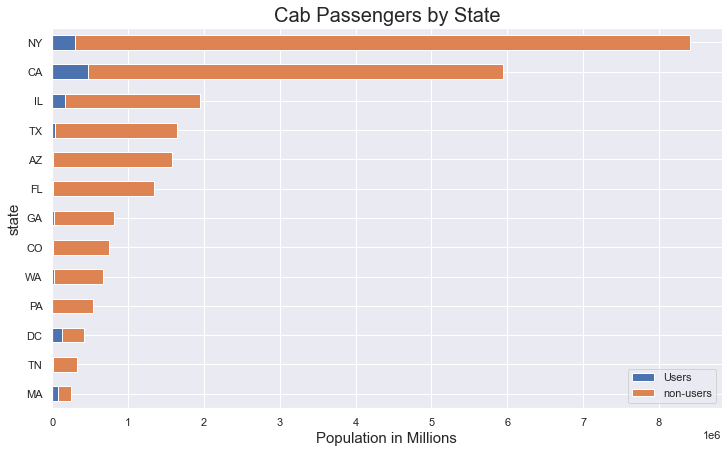

In [62]:
demograph.sort_values(['Population', 'Users'])[['Users', 'non-users']].\
plot(kind = 'barh', stacked = True, figsize = (12, 7), title = "Cab Passengers by State");

plt.xlabel("Population in Millions");

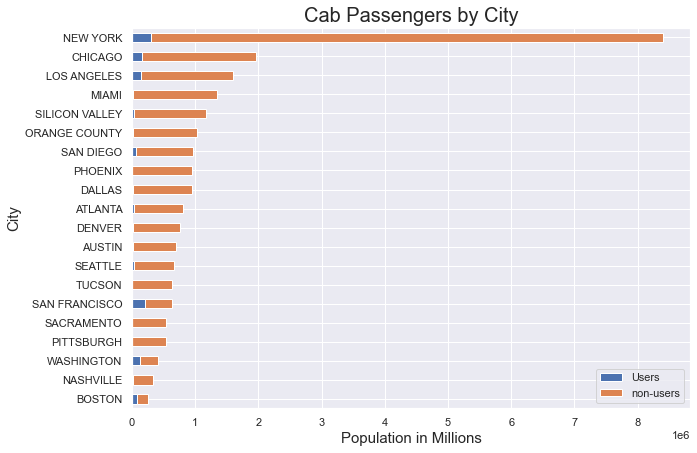

In [57]:
#Visualizing at City level

city_demog = city_df.groupby(['City']).mean()[['Population', 'Users']].sum(level = 0)

city_demog['non-users'] = city_demog['Population'] - city_demog['Users']

city_demog.sort_values(['Population', 'Users'])[['Users', 'non-users']].\
plot(kind = 'barh', stacked = True, figsize = (10, 7), title = "Cab Passengers by City");

plt.xlabel("Population in Millions");

Proportion of Total Male Customers: 57.29 %
Proportion of Total Female Customers: 42.71 %


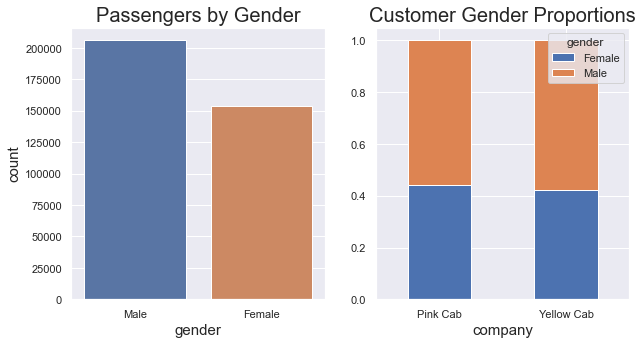

In [63]:
#Gender
print(f'Proportion of Total Male Customers: {full_df.gender.value_counts(normalize = True)[0]*100:.2f} %')
print(f'Proportion of Total Female Customers: {full_df.gender.value_counts(normalize = True)[1]*100:.2f} %')

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(full_df.gender, ax = ax[0]).set_title("Passengers by Gender");

pd.crosstab(index = full_df.company, columns = full_df.gender, normalize = 'index').\
plot(kind = 'bar', stacked = True, ax = ax[1], rot = 0, title = "Customer Gender Proportions");

# Visualizing Trips

In [64]:
full_df

transaction_id                   travel_date     company        city  \
0             10000013 1970-01-01 00:00:00.000042371    Pink Cab     ATLANTA   
1             10000029 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
2             10000030 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
3             10000041 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
4             10000045 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
...                ...                           ...         ...         ...   
359387        10439960 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359388        10439984 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359389        10440028 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359390        10440034 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359391        10440093 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   

        km_travelled  price_charged  cost_of_trip  customer_id payment_mode  \
0               9.04         125.20       97.6320        28712         Cash   
1              21.34         324.21      226.2040        58925         Card   
2              41.30         646.06      454.3000        58551         Card   
3              35.02         598.43      406.2320         4289         Card   
4               3.24          48.04       33.6960         5734         Card   
...              ...            ...           ...          ...          ...   
359387         33.93         474.47      411.2316        52449         Card   
359388         40.00         641.78      484.8000        51614         Card   
359389         26.22         405.25      327.2256        52389         Card   
359390         34.68         505.38      470.2608        51877         Cash   
359391          4.32          60.41       55.4688        53810         Cash   

        gender  age  cust_income state  
0         Male   53        11242    GA  
1         Male   38        26550    MA  
2         Male   25        21734    MA  
3         Male   19        28719    IL  
4         Male   23        22475    IL  
...        ...  ...          ...   ...  
359387  Female   40        23569    DC  
359388  Female   55        12279    DC  
359389  Female   29         5568    DC  
359390    Male   46        16993    DC  
359391    Male   23        21455    DC  

[359392 rows x 13 columns]

In [65]:
#Extracting date info from travel_date

full_df['year'] = full_df.travel_date.dt.year
full_df['month'] = full_df.travel_date.dt.month
full_df['day'] = full_df.travel_date.dt.day
full_df['day_of_week'] = full_df.travel_date.dt.dayofweek

In [66]:
full_df

transaction_id                   travel_date     company        city  \
0             10000013 1970-01-01 00:00:00.000042371    Pink Cab     ATLANTA   
1             10000029 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
2             10000030 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
3             10000041 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
4             10000045 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
...                ...                           ...         ...         ...   
359387        10439960 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359388        10439984 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359389        10440028 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359390        10440034 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359391        10440093 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   

        km_travelled  price_charged  cost_of_trip  customer_id payment_mode  \
0               9.04         125.20       97.6320        28712         Cash   
1              21.34         324.21      226.2040        58925         Card   
2              41.30         646.06      454.3000        58551         Card   
3              35.02         598.43      406.2320         4289         Card   
4               3.24          48.04       33.6960         5734         Card   
...              ...            ...           ...          ...          ...   
359387         33.93         474.47      411.2316        52449         Card   
359388         40.00         641.78      484.8000        51614         Card   
359389         26.22         405.25      327.2256        52389         Card   
359390         34.68         505.38      470.2608        51877         Cash   
359391          4.32          60.41       55.4688        53810         Cash   

        gender  age  cust_income state  year  month  day  day_of_week  
0         Male   53        11242    GA  1970      1    1            3  
1         Male   38        26550    MA  1970      1    1            3  
2         Male   25        21734    MA  1970      1    1            3  
3         Male   19        28719    IL  1970      1    1            3  
4         Male   23        22475    IL  1970      1    1            3  
...        ...  ...          ...   ...   ...    ...  ...          ...  
359387  Female   40        23569    DC  1970      1    1            3  
359388  Female   55        12279    DC  1970      1    1            3  
359389  Female   29         5568    DC  1970      1    1            3  
359390    Male   46        16993    DC  1970      1    1            3  
359391    Male   23        21455    DC  1970      1    1            3  

[359392 rows x 17 columns]

In [71]:
trip = full_df.groupby(['travel_date', 'company']).size().reset_index().rename(columns = {0:'count'})
trip

travel_date     company  count
0    1970-01-01 00:00:00.000042371    Pink Cab     41
1    1970-01-01 00:00:00.000042371  Yellow Cab    140
2    1970-01-01 00:00:00.000042372    Pink Cab     52
3    1970-01-01 00:00:00.000042372  Yellow Cab    126
4    1970-01-01 00:00:00.000042373    Pink Cab      4
...                            ...         ...    ...
2185 1970-01-01 00:00:00.000043463  Yellow Cab    630
2186 1970-01-01 00:00:00.000043464    Pink Cab     56
2187 1970-01-01 00:00:00.000043464  Yellow Cab    201
2188 1970-01-01 00:00:00.000043465    Pink Cab     58
2189 1970-01-01 00:00:00.000043465  Yellow Cab    198

[2190 rows x 3 columns]

In [75]:
trip['day'] = trip.travel_date.dt.day_name()
trip

travel_date     company  count       day
0    1970-01-01 00:00:00.000042371    Pink Cab     41  Thursday
1    1970-01-01 00:00:00.000042371  Yellow Cab    140  Thursday
2    1970-01-01 00:00:00.000042372    Pink Cab     52  Thursday
3    1970-01-01 00:00:00.000042372  Yellow Cab    126  Thursday
4    1970-01-01 00:00:00.000042373    Pink Cab      4  Thursday
...                            ...         ...    ...       ...
2185 1970-01-01 00:00:00.000043463  Yellow Cab    630  Thursday
2186 1970-01-01 00:00:00.000043464    Pink Cab     56  Thursday
2187 1970-01-01 00:00:00.000043464  Yellow Cab    201  Thursday
2188 1970-01-01 00:00:00.000043465    Pink Cab     58  Thursday
2189 1970-01-01 00:00:00.000043465  Yellow Cab    198  Thursday

[2190 rows x 4 columns]

In [82]:
#Assigning Colors for companies
palette = ['#F24C4C', '#F7D716']

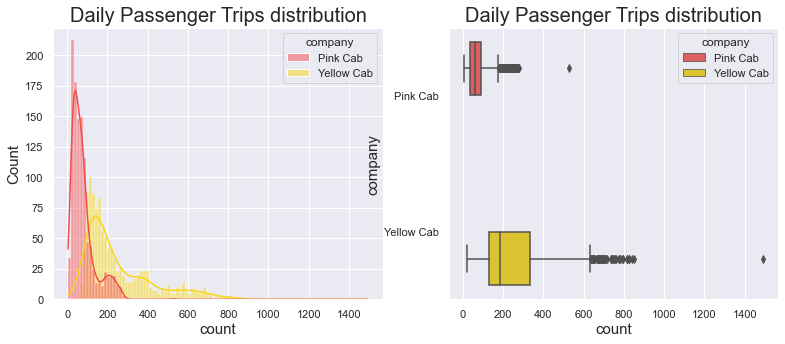

In [101]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(x = 'count', hue = 'company', data = trip, kde = True, palette = palette, 
             bins = 100, ax = ax[0]).set_title("Daily Passenger Trips distribution");

sns.boxplot(x = 'count', y = 'company', data = trip, hue = 'company', palette = palette, 
            ax = ax[1]).set_title("Daily Passenger Trips distribution");


The above plots depicts the distribution of daily trips by both Cab companies.  Yellow Cab  has a higher median trips compared to  Pink Cab . Both distributions are skewed to the right, signifying that greater number of trips on some days are rarer.

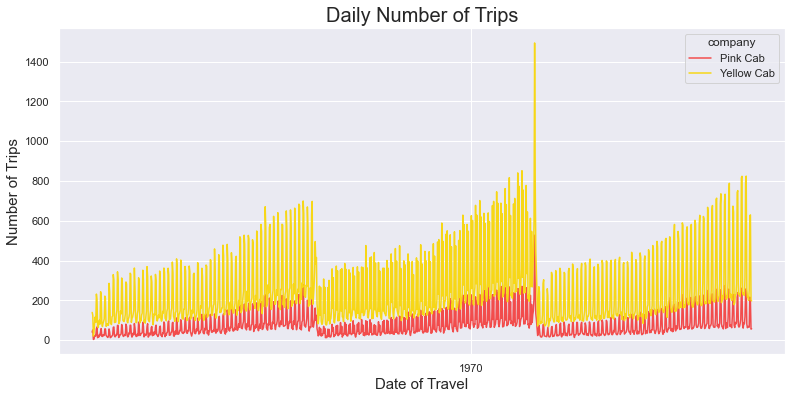

In [100]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);
plt.title('Daily Number of Trips');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');

The above plots displays daily trips made by both Cab companies from beginning of 2016 till the end of 2018. There is a clear seasonality on a weekly, monthly and yearly level for both Cab companies. Both Cab companies follows the same patterns.

On a monthly level, there is a clear upward trend. On new year, the daily trips dips down to the lowest again. But on a yearly level, the trend seems to be almost uniform.

Yellow Cab  makes significantly more trips on any given day compared to  Pink Cab . The highest reported trips for both Cab companies was on 5th of January, 2018.

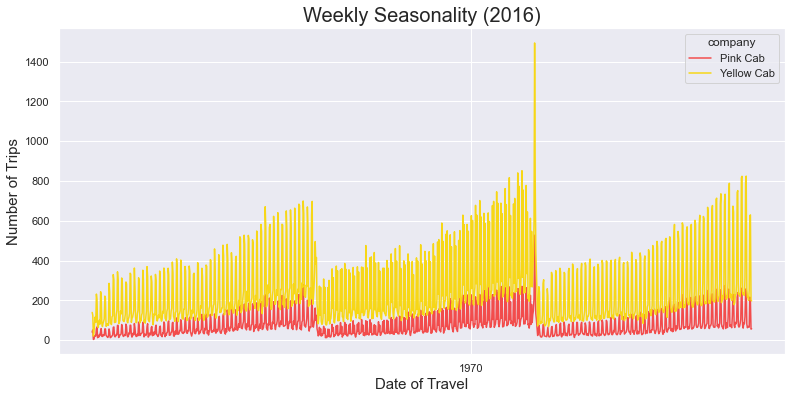

In [178]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2016)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
#plt.xlim(16801, 17167);

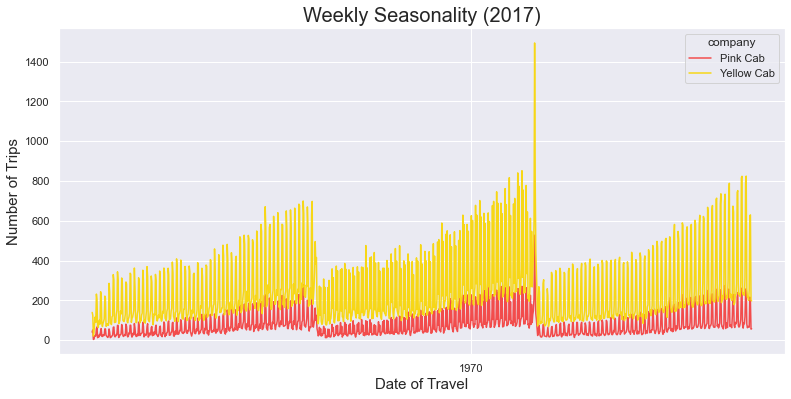

In [179]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2017)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
#plt.xlim(17167, 17532);


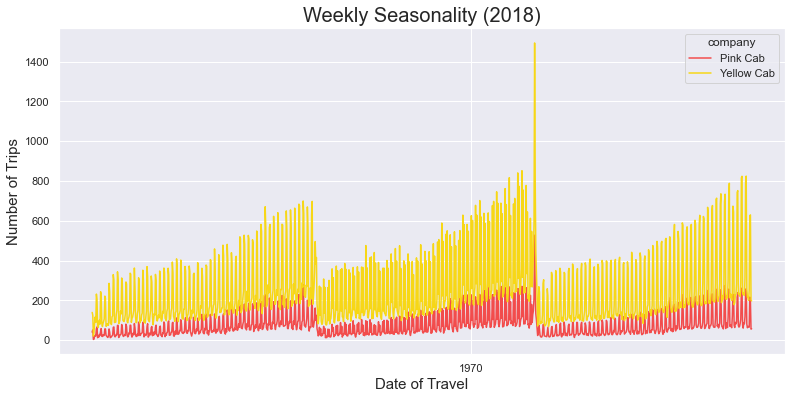

In [180]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2018)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
#plt.xlim(17532, 17897);

For the year 2017, the seasonality pattern is different compared to both 2016 and 2018.

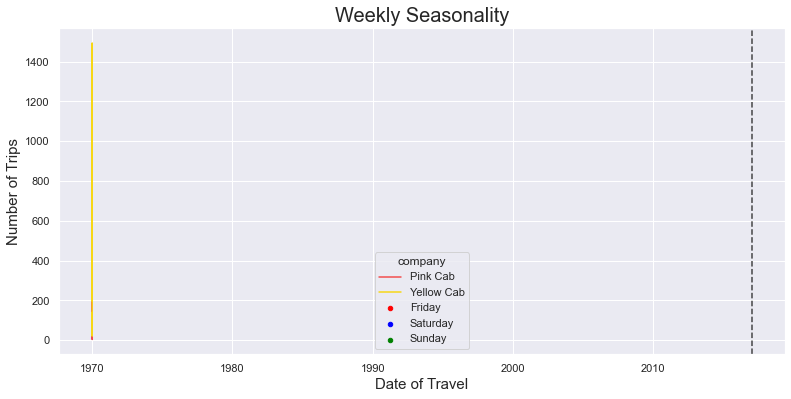

In [181]:
#Selecting range of months
#2016 to 2017

plt.figure(figsize = (13,6))

ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.axvline(x = 17167, color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);


plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
#plt.xlim(17120, 17200);

On any given month, there is a weekly seasonality where the number of trips are especially high during the weekends (Saturday and Sunday) for the year 2016.

Interestingly, for the year 2017, the seasonality starts to change. There is an increase in number of rides during Friday, then it dips down on Saturday and then increases again during Sunday. This pattern is observed for both Cab companies.

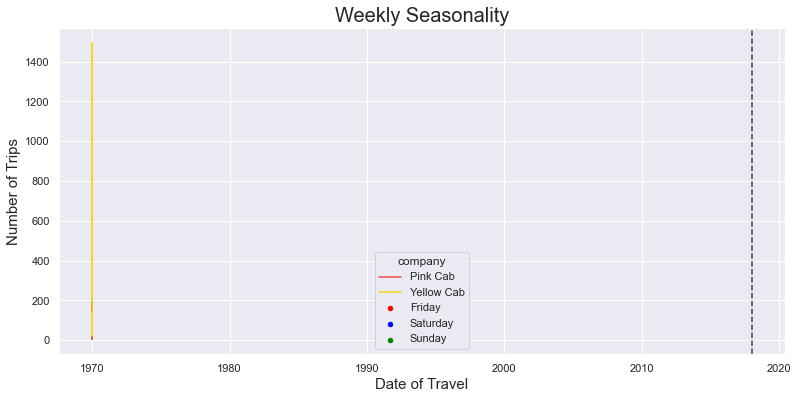

In [182]:
#2017 to 2018

plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.axvline(x = 17532, color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);

plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
#plt.xlim(17470, 17600);

From 2017 to 2018, the pattern changes once again, this time, there is a peak of riders during Friday, then Saturday but then dips to down to low during Sunday.

add Codeadd Markdown
Let's look closely into number of trips during the 5th January 2018.

In [106]:
daily_trip_city = full_df.groupby(['travel_date', 'city', 'company']).size().reset_index().\
                                                            rename(columns = {0 : 'count'})

daily_trip_city

travel_date            city     company  count
0     1970-01-01 00:00:00.000042371         ATLANTA    Pink Cab      1
1     1970-01-01 00:00:00.000042371         ATLANTA  Yellow Cab      4
2     1970-01-01 00:00:00.000042371          BOSTON    Pink Cab      2
3     1970-01-01 00:00:00.000042371          BOSTON  Yellow Cab      8
4     1970-01-01 00:00:00.000042371         CHICAGO    Pink Cab      7
...                             ...             ...         ...    ...
32840 1970-01-01 00:00:00.000043465  SILICON VALLEY  Yellow Cab      4
32841 1970-01-01 00:00:00.000043465          TUCSON    Pink Cab      1
32842 1970-01-01 00:00:00.000043465          TUCSON  Yellow Cab      2
32843 1970-01-01 00:00:00.000043465      WASHINGTON    Pink Cab      1
32844 1970-01-01 00:00:00.000043465      WASHINGTON  Yellow Cab     29

[32845 rows x 4 columns]

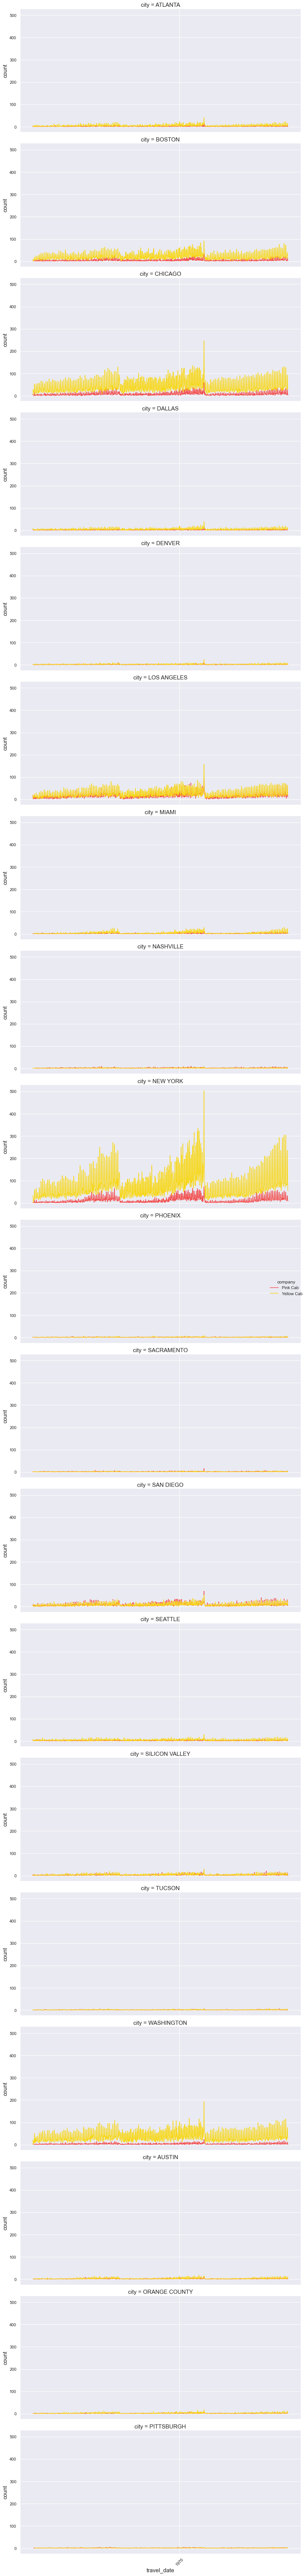

In [183]:
sns.relplot(x = 'travel_date', y = 'count', row = 'city', hue = 'company', 
            palette = palette, data = daily_trip_city, kind = 'line', aspect = 2);

#plt.xlim(17532, 17542);
plt.xticks(rotation = 45);
plt.tight_layout();

The highest spike in the number of rides can be noticed in New York, followed by Chicago, Washington and Los Angeles. It is unknown why there was a spike in number of rides on this particular day. There was a blizzard storm in New York during the first week of January on 2018. Unfortunately, I wasn't able to find any suitable weather datasets during this time period for any of the states.

Next, I will visualize the data on a Month level basis.

In [108]:
#Aggregating at a month level to visualize month seasonality

month_trip = full_df.groupby(['year', 'month', 'company']).size().reset_index().\
                                                    rename(columns = {0:'count'})
month_trip

year  month     company   count
0  1970      1    Pink Cab   84711
1  1970      1  Yellow Cab  274681

In [109]:
month_trip['month_level'] = month_trip['year'].astype('str') + "-" + month_trip['month'].astype('str')
month_trip

year  month     company   count month_level
0  1970      1    Pink Cab   84711      1970-1
1  1970      1  Yellow Cab  274681      1970-1

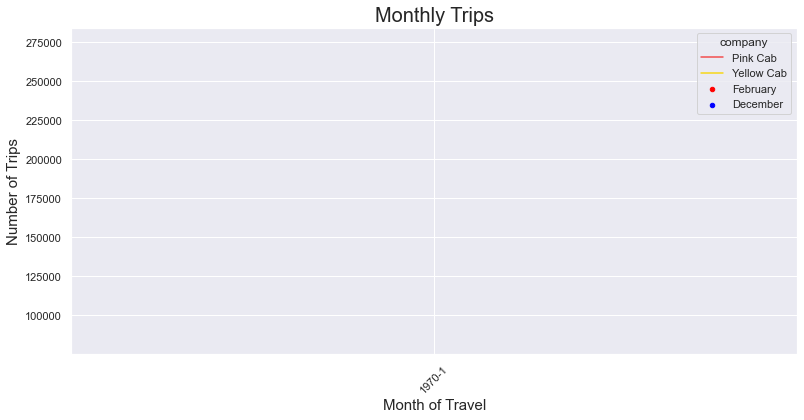

In [110]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'month_level', y = 'count', data = month_trip, hue = 'company', 
             palette = palette);

for month, name, color in zip([2,12], ['February', 'December'], ['red', 'blue']):
    month_trip.query(f"month == '{month}'")[['month_level', 'count']].\
    plot.scatter(x = 'month_level', y = 'count', ax = ax, label = f'{name}', color = color);

plt.xticks(rotation = 45)
plt.title('Monthly Trips');
plt.xlabel('Month of Travel');
plt.ylabel('Number of Trips');

When aggregating trips at a monthly level, again, there is a clear seasonality. The number of trips at the month of February is the lowest and the number of trips at the month of December is the highest for all the years. For both Cab companies, there is a slight upward trend throughout the years.

Next, I will visualize monthly trips per city for both Cab companies

In [111]:
city_trips_month = full_df.groupby(['year', 'month', 'city', 'company']).size().\
                                    reset_index().rename(columns = {0:'count'})

city_trips_month['month_level'] = city_trips_month['year'].astype('str') + "_" + \
                                                city_trips_month['month'].astype('str')

city_trips_month

year  month            city     company  count month_level
0   1970      1         ATLANTA    Pink Cab   1762      1970_1
1   1970      1         ATLANTA  Yellow Cab   5795      1970_1
2   1970      1          AUSTIN    Pink Cab   1868      1970_1
3   1970      1          AUSTIN  Yellow Cab   3028      1970_1
4   1970      1          BOSTON    Pink Cab   5186      1970_1
5   1970      1          BOSTON  Yellow Cab  24506      1970_1
6   1970      1         CHICAGO    Pink Cab   9361      1970_1
7   1970      1         CHICAGO  Yellow Cab  47264      1970_1
8   1970      1          DALLAS    Pink Cab   1380      1970_1
9   1970      1          DALLAS  Yellow Cab   5637      1970_1
10  1970      1          DENVER    Pink Cab   1394      1970_1
11  1970      1          DENVER  Yellow Cab   2431      1970_1
12  1970      1     LOS ANGELES    Pink Cab  19865      1970_1
13  1970      1     LOS ANGELES  Yellow Cab  28168      1970_1
14  1970      1           MIAMI    Pink Cab   2002      1970_1
15  1970      1           MIAMI  Yellow Cab   4452      1970_1
16  1970      1       NASHVILLE    Pink Cab   1841      1970_1
17  1970      1       NASHVILLE  Yellow Cab   1169      1970_1
18  1970      1        NEW YORK    Pink Cab  13967      1970_1
19  1970      1        NEW YORK  Yellow Cab  85918      1970_1
20  1970      1   ORANGE COUNTY    Pink Cab   1513      1970_1
21  1970      1   ORANGE COUNTY  Yellow Cab   2469      1970_1
22  1970      1         PHOENIX    Pink Cab    864      1970_1
23  1970      1         PHOENIX  Yellow Cab   1200      1970_1
24  1970      1      PITTSBURGH    Pink Cab    682      1970_1
25  1970      1      PITTSBURGH  Yellow Cab    631      1970_1
26  1970      1      SACRAMENTO    Pink Cab   1334      1970_1
27  1970      1      SACRAMENTO  Yellow Cab   1033      1970_1
28  1970      1       SAN DIEGO    Pink Cab  10672      1970_1
29  1970      1       SAN DIEGO  Yellow Cab   9816      1970_1
30  1970      1         SEATTLE    Pink Cab   2732      1970_1
31  1970      1         SEATTLE  Yellow Cab   5265      1970_1
32  1970      1  SILICON VALLEY    Pink Cab   3797      1970_1
33  1970      1  SILICON VALLEY  Yellow Cab   4722      1970_1
34  1970      1          TUCSON    Pink Cab    799      1970_1
35  1970      1          TUCSON  Yellow Cab   1132      1970_1
36  1970      1      WASHINGTON    Pink Cab   3692      1970_1
37  1970      1      WASHINGTON  Yellow Cab  40045      1970_1

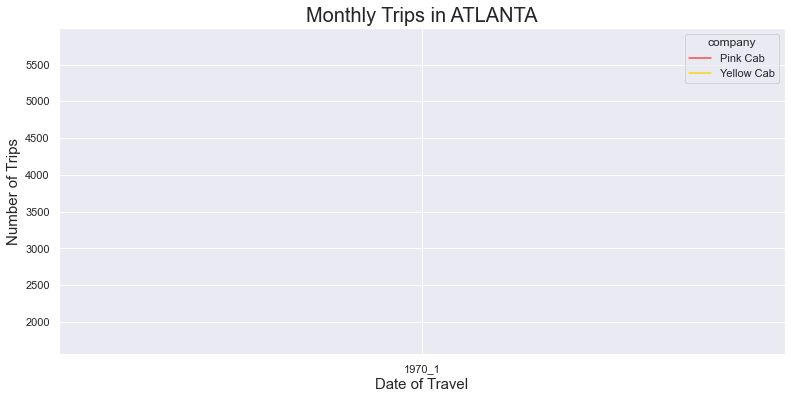

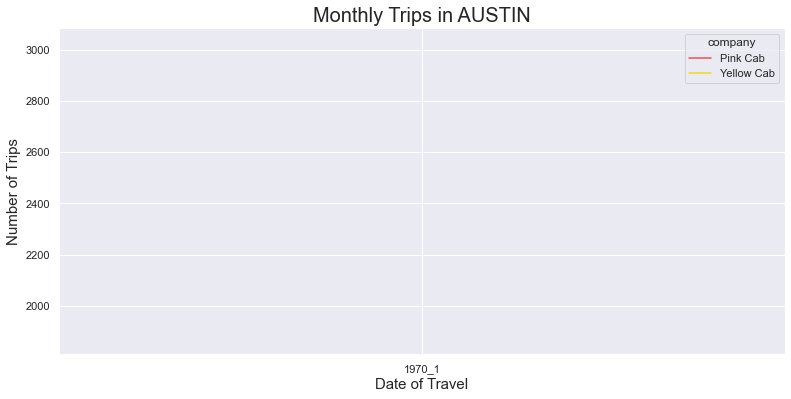

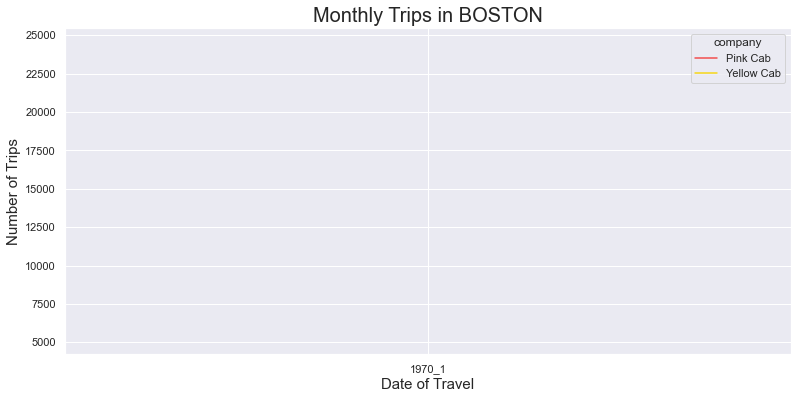

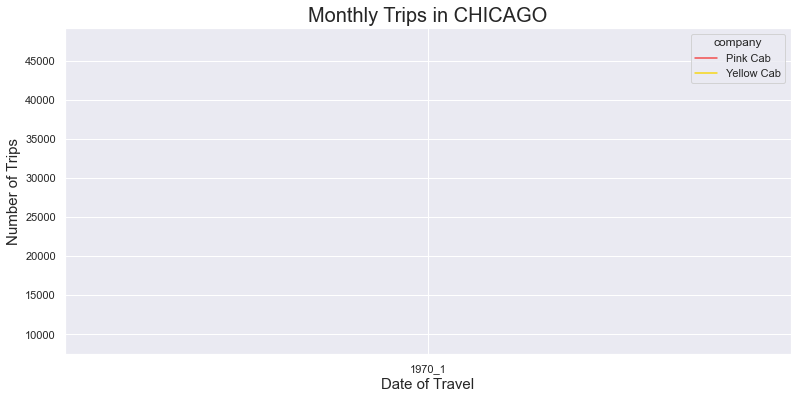

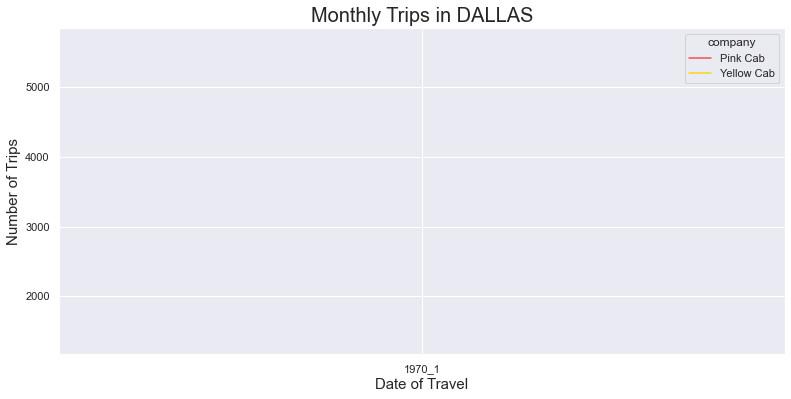

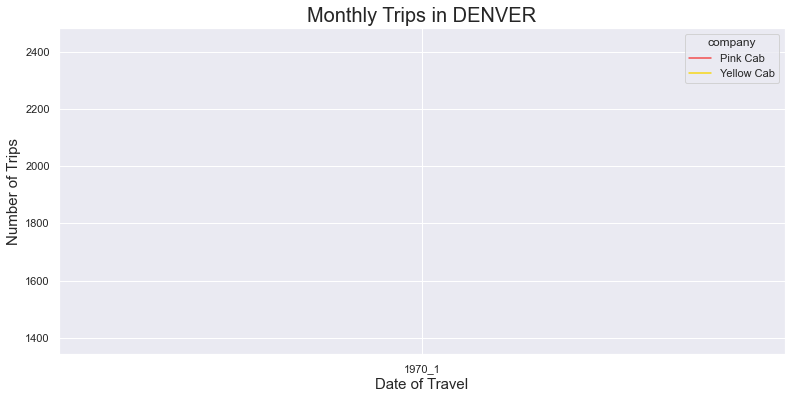

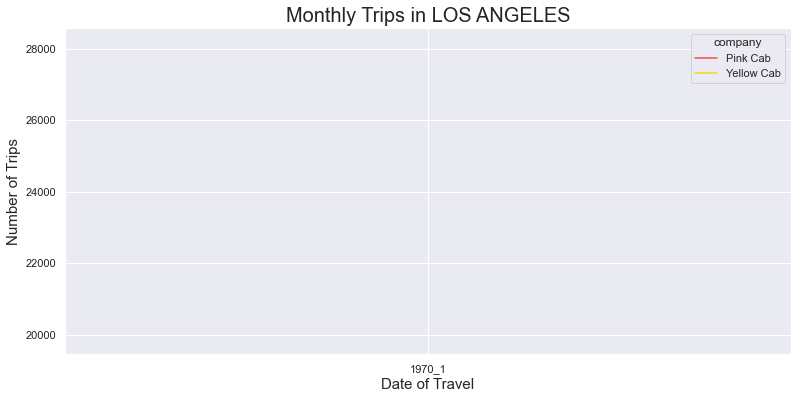

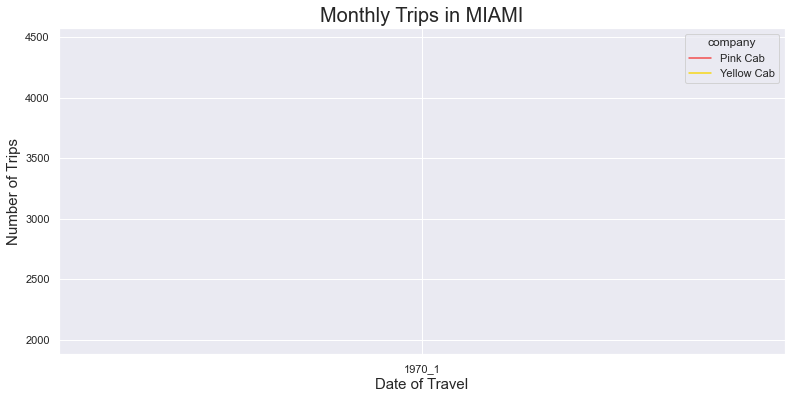

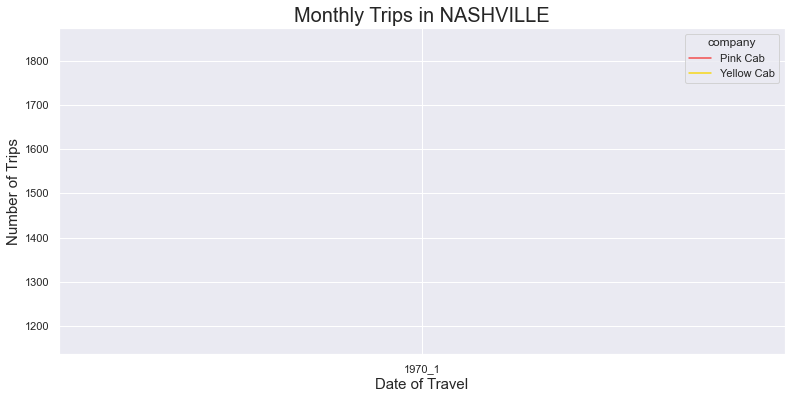

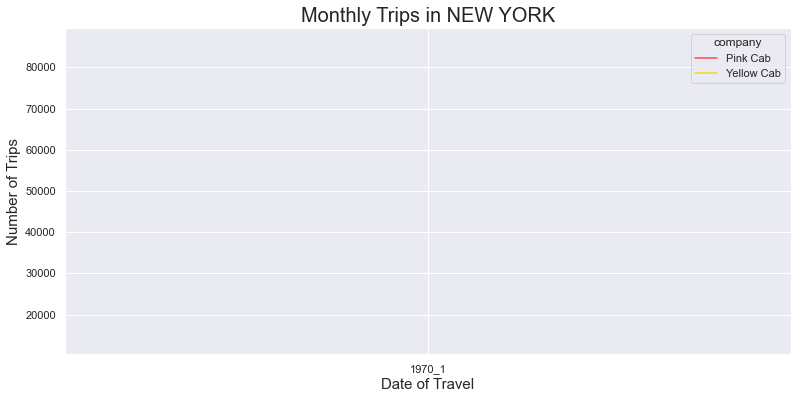

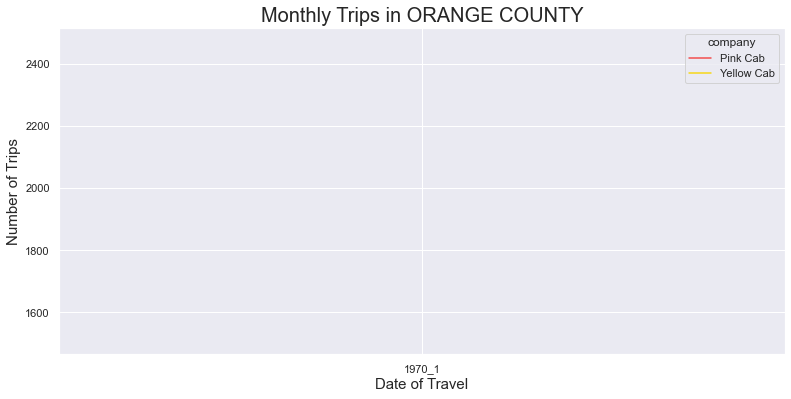

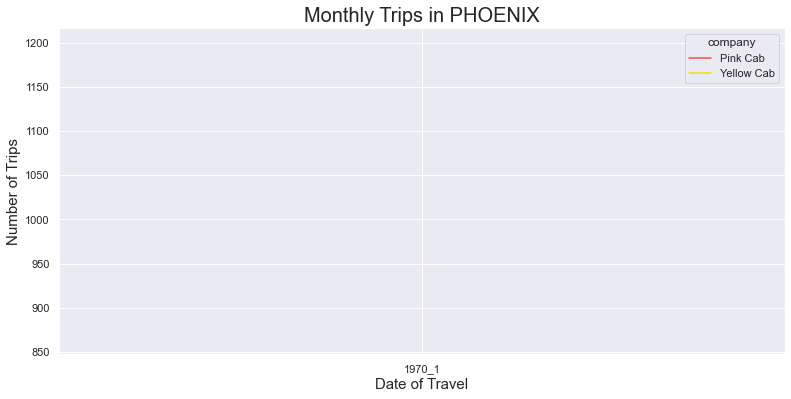

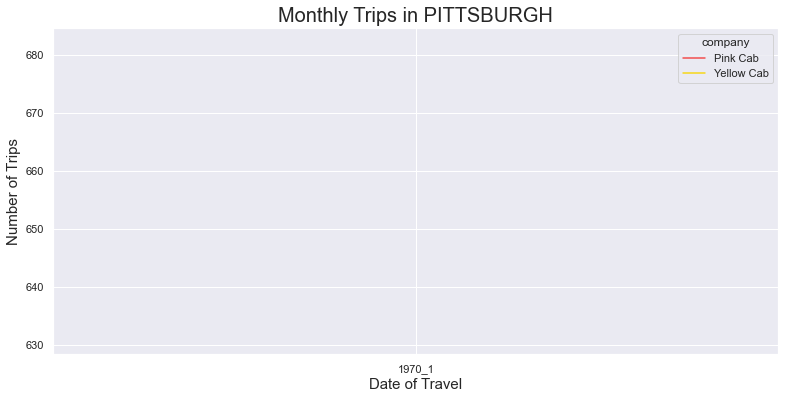

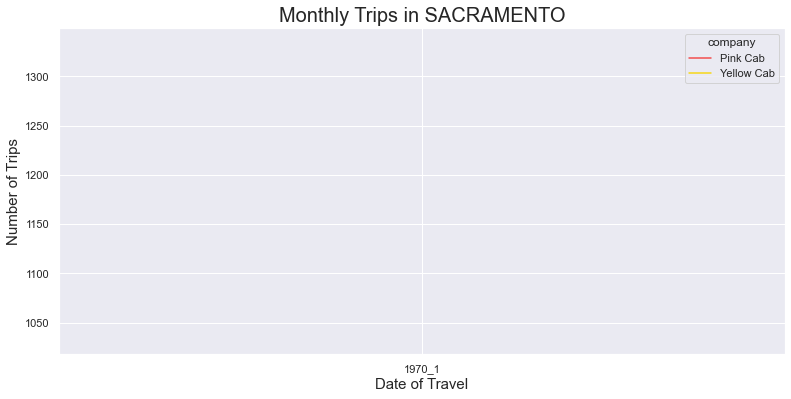

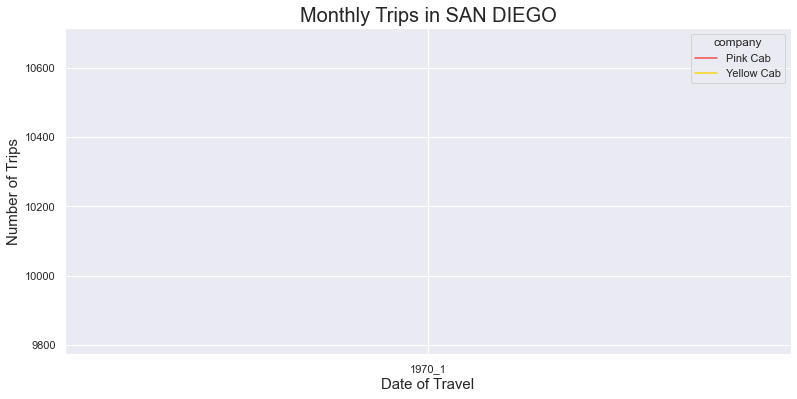

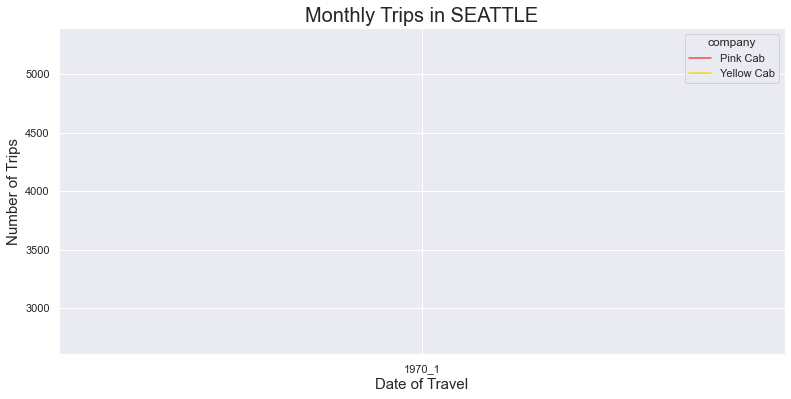

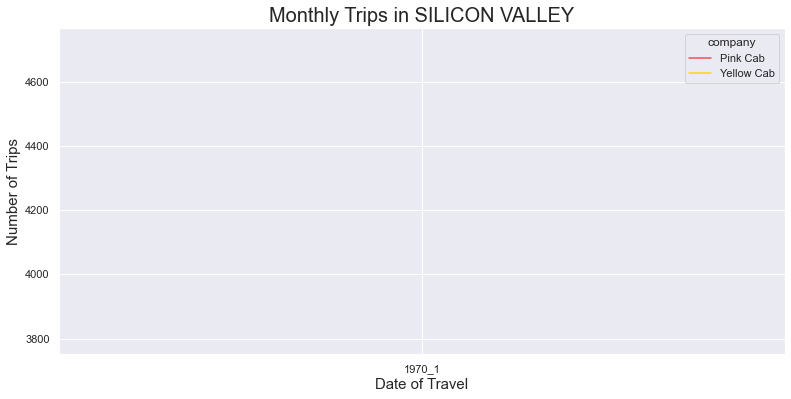

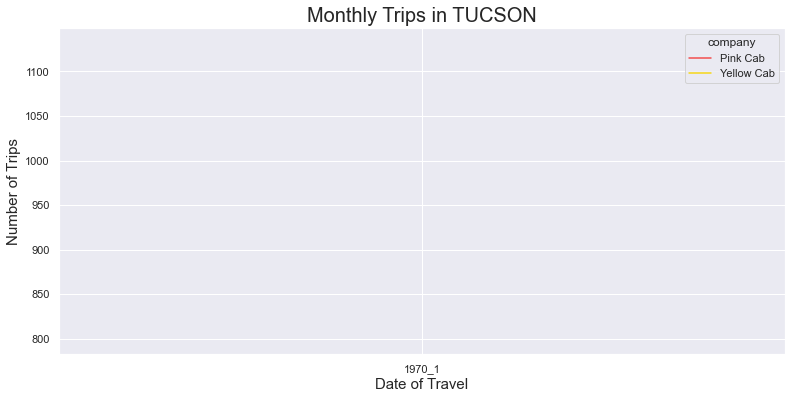

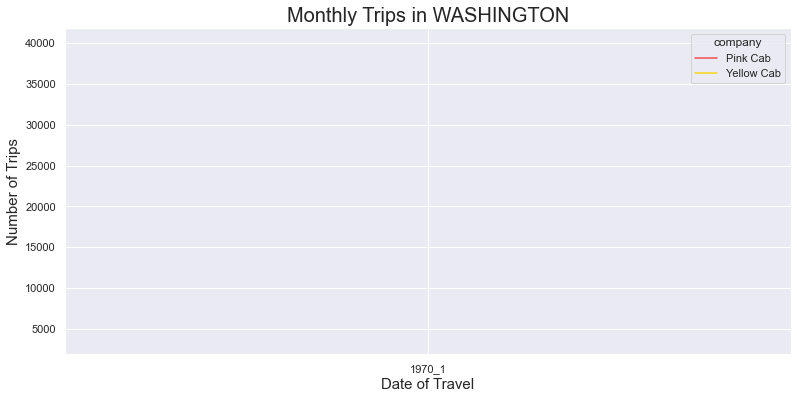

In [184]:
for i in city_trips_month.city.unique():
    plt.figure(figsize = (13,6))
    temp_df = city_trips_month.query(f"city == '{i}'")
    
    sns.lineplot(x = 'month_level', y = 'count', data = temp_df, hue = 'company', 
                 palette = palette);

    plt.title(f'Monthly Trips in {i}');
    plt.xlabel('Date of Travel');
    plt.ylabel('Number of Trips');
    plt.xticks(rotation = 45)

The above plots displays patterns at city level more clearly.


Yellow Cab  thrives on the following cities: Atlanta, Austin, Boston, Chicago, Dallas, Denver, Los Angeles, Miami, New York, Orange County, Phoenix, Seattle, Silicon Valley, Tucson, Washington.

Pink Cab  thrives on the following cities: Nashville and Sacramento.

In cities such as **Pittsburgh and San Diego** both companies have almost the same number of rides.

Overall,  Yellow Cab  company seems to perform well in terms of the number of rides during the time period.

# Visualizing Trip information

What is the income made by the driver for each trip?
Assumptions

1) Due to limited available data on the Internet, I will assume that the expenses for the trip only involves fuel charges.

2) There aren't sufficient data on the Internet for the base fares per year for each city in the US. This will be left out of the analysis.



In [114]:
full_df['profit'] = full_df.price_charged - full_df.cost_of_trip #operating income
full_df

transaction_id                   travel_date     company        city  \
0             10000013 1970-01-01 00:00:00.000042371    Pink Cab     ATLANTA   
1             10000029 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
2             10000030 1970-01-01 00:00:00.000042371    Pink Cab      BOSTON   
3             10000041 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
4             10000045 1970-01-01 00:00:00.000042371    Pink Cab     CHICAGO   
...                ...                           ...         ...         ...   
359387        10439960 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359388        10439984 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359389        10440028 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359390        10440034 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   
359391        10440093 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   

        km_travelled  price_charged  cost_of_trip  customer_id payment_mode  \
0               9.04         125.20       97.6320        28712         Cash   
1              21.34         324.21      226.2040        58925         Card   
2              41.30         646.06      454.3000        58551         Card   
3              35.02         598.43      406.2320         4289         Card   
4               3.24          48.04       33.6960         5734         Card   
...              ...            ...           ...          ...          ...   
359387         33.93         474.47      411.2316        52449         Card   
359388         40.00         641.78      484.8000        51614         Card   
359389         26.22         405.25      327.2256        52389         Card   
359390         34.68         505.38      470.2608        51877         Cash   
359391          4.32          60.41       55.4688        53810         Cash   

        gender  age  cust_income state  year  month  day  day_of_week  \
0         Male   53        11242    GA  1970      1    1            3   
1         Male   38        26550    MA  1970      1    1            3   
2         Male   25        21734    MA  1970      1    1            3   
3         Male   19        28719    IL  1970      1    1            3   
4         Male   23        22475    IL  1970      1    1            3   
...        ...  ...          ...   ...   ...    ...  ...          ...   
359387  Female   40        23569    DC  1970      1    1            3   
359388  Female   55        12279    DC  1970      1    1            3   
359389  Female   29         5568    DC  1970      1    1            3   
359390    Male   46        16993    DC  1970      1    1            3   
359391    Male   23        21455    DC  1970      1    1            3   

          profit  
0        27.5680  
1        98.0060  
2       191.7600  
3       192.1980  
4        14.3440  
...          ...  
359387   63.2384  
359388  156.9800  
359389   78.0244  
359390   35.1192  
359391    4.9412  

[359392 rows x 18 columns]

In [115]:
full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit']].describe().T

count        mean         std     min       25%      50%  \
km_travelled   359392.0   22.567254   12.233526    1.90   12.0000   22.440   
price_charged  359392.0  423.443311  274.378911   15.60  206.4375  386.360   
cost_of_trip   359392.0  286.190113  157.993661   19.00  151.2000  282.480   
profit         359392.0  137.253198  160.311840 -220.06   28.0120   81.962   

                    75%       max  
km_travelled    32.9600    48.000  
price_charged  583.6600  2048.030  
cost_of_trip   413.6832   691.200  
profit         190.0300  1463.966

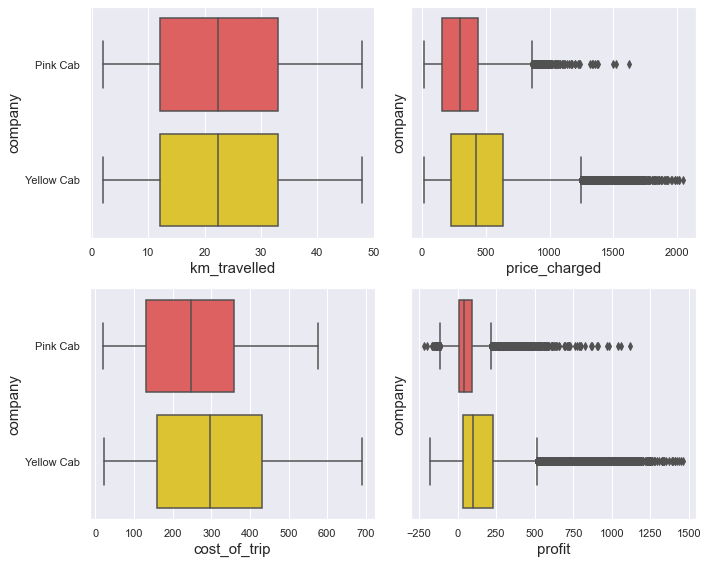

In [186]:
fig, axes = plt.subplots(2,2, figsize = (10,8), sharey = True)

for col, ax in zip(['km_travelled', 'price_charged', 'cost_of_trip', 'profit'], 
                   axes.flatten()):
    
    sns.boxplot(x = col, data = full_df, y = 'company', ax = ax, palette = palette);
    plt.tight_layout();

Above plots illustrates distribution of features related to the trip. The distributions of the distance traveled, Cab expenses all follow a uniform distribution. Only profit follows a Gaussian distribution that is skewed to the right.

There are high outliers on the right side of both profit and price charged columns.Both Cab companies has the same median distance traveled.  Yellow Cab  has a higher Cab expenses overall. The median price charged by  Pink Cab  is lower than it's rival company. The profit of  Yellow Cab  is significantly higher.

Both Cab companies has made some  losses , as is evidents on the left side of the profit box plots. I will take a closer look at this in the next sessions.


I have a hypothesis that the outliers in the price_charged variable might be due to Cabs offering 'Premium' services, where the company offers trips in luxury or high-end vehicles. In order to test this hypothesis, I will cap the price range according to the upper limit of the inter-quantile rage for both Cab company's price_charged variable.

According to my hypothesis, customers who calls for premium cabs are richer and they would use premium cabs to travel any distance.

In [117]:
#For yellow cab

yc_IQR = full_df.query('company == "Yellow Cab"').price_charged.quantile(0.75) - \
         full_df.query('company == "Yellow Cab"').price_charged.quantile(0.25)

pc_IQR = full_df.query('company == "Pink Cab"').price_charged.quantile(0.75) - \
         full_df.query('company == "Pink Cab"').price_charged.quantile(0.25)

print(f'Yellow Cab IQR = {yc_IQR:.3f}')
print(f'Pink Cab IQR = {pc_IQR:.3f}')

distance = 1.5

yc_upper_limit = full_df.query('company == "Yellow Cab"').price_charged.quantile(0.75) + \
                 (yc_IQR * distance)

pc_upper_limit = full_df.query('company == "Pink Cab"').price_charged.quantile(0.75) + \
                 (pc_IQR * distance)

print()
print(f"Yellow Cab Upper Bounday = {yc_upper_limit:.3f}")
print(f"Pink Cab Upper Bounday = {pc_upper_limit:.3f}")

Yellow Cab IQR = 407.200
Pink Cab IQR = 281.535

Yellow Cab Upper Bounday = 1244.680
Pink Cab Upper Bounday = 863.807


In [118]:
#Creating new varibale called 'is_premium'. Premium trips are marked as 1.

is_premium = []

for i in range(len(full_df)):
    if full_df['company'][i] == 'Yellow Cab':
        if full_df['price_charged'][i] >= yc_upper_limit:
            is_premium.append(1)
        else:
            is_premium.append(0)
    else:
        if full_df['price_charged'][i] >= pc_upper_limit:
            is_premium.append(1)
        else:
            is_premium.append(0)
    
full_df['is_premium'] = is_premium

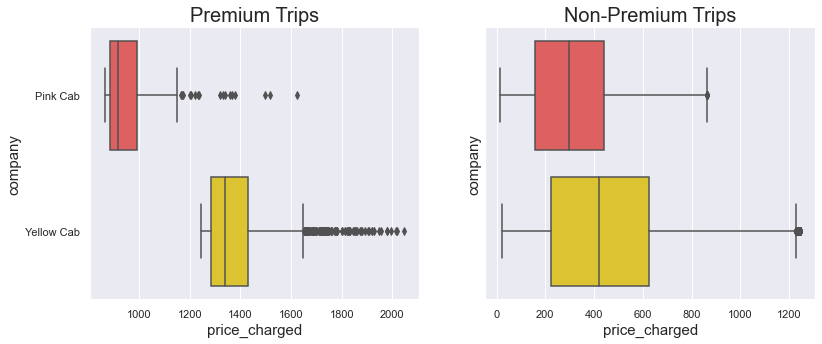

In [119]:
premium_trips = full_df.query('is_premium == 1')
non_premium_trips = full_df.query('is_premium == 0')

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.boxplot(x = 'price_charged', y = 'company', data = premium_trips, palette = palette, 
            order = ['Pink Cab', 'Yellow Cab'], ax = ax[0]).\
set_title('Premium Trips');


sns.boxplot(x = 'price_charged', y = 'company', data = non_premium_trips, palette = palette, ax = ax[1]).\
set_title('Non-Premium Trips');

From the above plots, price charged has been further split based on the premium category. Premium trips have a higher price range compared to non-premium trips. Almost all of the outliers within the non-premium trips has been removed. But for the premium trips, there are still outliers at the higher end of the price_charged variable.

Next, I will see how premium rides associate with Distance and customer income.

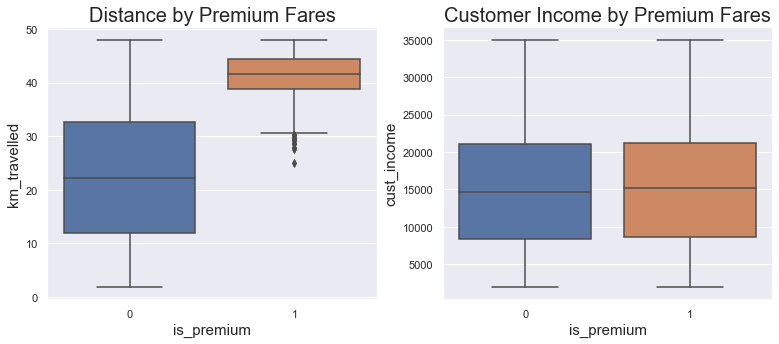

In [120]:
fig, ax = plt.subplots(1,2, figsize = (13,5))

sns.boxplot(y = 'km_travelled', x = 'is_premium', data = full_df, ax = ax[0]).\
set_title('Distance by Premium Fares');

sns.boxplot(y = 'cust_income', x = 'is_premium', data = full_df, ax = ax[1]).\
set_title('Customer Income by Premium Fares');

The above plots clearly illustrates that perhaps price_charged for the trips mainly depends on the distance traveled and that customer's income don't have much of an affect. Therefore, my hypothesis is wrong regarding the price_charged variable.

Next, I will visualize the data in a way that might reveal any correlation between these features. I will only take a sample of the data as it is computationally expensive to plot a Pairplot using the whole dataset.

CPU times: user 6.91 s, sys: 1.19 s, total: 8.1 s
Wall time: 6.53 s


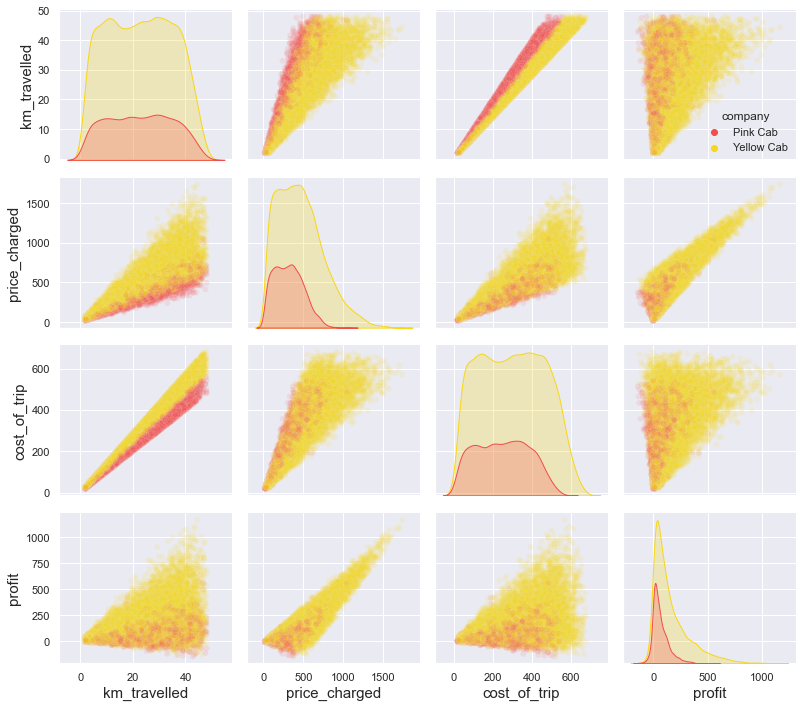

In [121]:
%%time
sampled_df_1 = full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit', 
                      'company']].sample(frac = 0.05, random_state=42)

g = sns.pairplot(sampled_df_1, hue = 'company', hue_order = ['Pink Cab', 'Yellow Cab'], 
             palette = palette, plot_kws={'alpha': 0.1});

g._legend.set_bbox_to_anchor((0.98, 0.8))

plt.tight_layout()

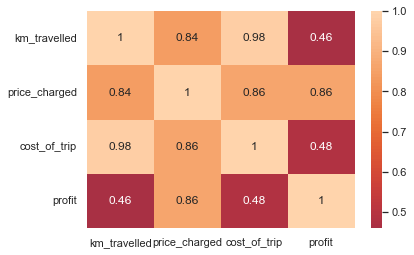

In [122]:
sns.heatmap(sampled_df_1.corr(), annot = True, center = 0);

The above plots clearly depicts that all features are correlated with each other. In general, as the distance of travel increases, both Cab expenses and Cab fares increases. The correlation is strong between distance traveled and Cab expenses.

For price, expense and profit variables, distance traveled is the compounding variable.

For the operational expenses, there is a greater spread between all of the variables. When looking closely at the scatter plot between price charged and profit, the spread is higher when the price charged is low but the spread becomes less as the price charged increases.

Is daily number of trips and total distance traveled in a day correlated?

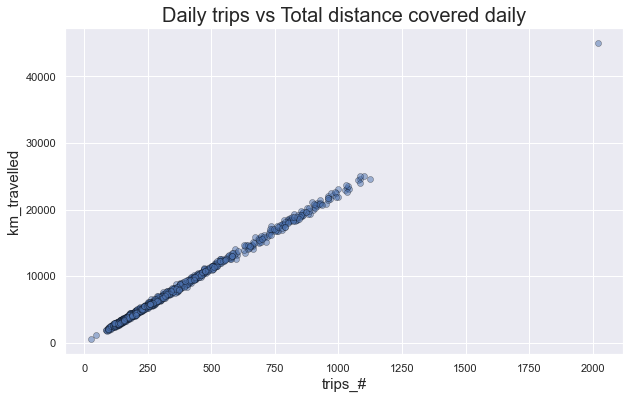

In [123]:
trip_distance_df = full_df.groupby('travel_date').agg({'km_travelled' : 'sum', 'city' : 'count'}).\
                   rename(columns = {'city' : 'trips_#'})

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'trips_#', y = 'km_travelled', data = trip_distance_df, edgecolor = 'black', 
                alpha = 0.5).set_title("Daily trips vs Total distance covered daily");

There is a perfect correlation between number of trips and total distance traveled in a day. Therefore either one of these variables determines both company's daily revenues, expenses and profits.

Loses: 
In this section, we look closely at the trips did not turn a profit.

In [124]:
loss = full_df.query("profit <= 0")
loss

transaction_id                   travel_date     company        city  \
10            10000066 1970-01-01 00:00:00.000042371    Pink Cab      DALLAS   
11            10000067 1970-01-01 00:00:00.000042371    Pink Cab      DALLAS   
12            10000070 1970-01-01 00:00:00.000042371    Pink Cab      DENVER   
34            10000356 1970-01-01 00:00:00.000042371    Pink Cab     SEATTLE   
389           10000378 1970-01-01 00:00:00.000042374    Pink Cab  WASHINGTON   
...                ...                           ...         ...         ...   
359335        10438112 1970-01-01 00:00:00.000043465  Yellow Cab     CHICAGO   
359336        10438116 1970-01-01 00:00:00.000043465  Yellow Cab     CHICAGO   
359338        10438152 1970-01-01 00:00:00.000043465  Yellow Cab     CHICAGO   
359340        10438192 1970-01-01 00:00:00.000043465  Yellow Cab     CHICAGO   
359386        10439934 1970-01-01 00:00:00.000043465  Yellow Cab  WASHINGTON   

        km_travelled  price_charged  cost_of_trip  customer_id payment_mode  \
10             13.13         122.42      149.6820        25155         Card   
11             33.32         308.58      386.5120        25247         Cash   
12              7.02          61.30       82.8360        30718         Cash   
34             14.95         171.47      171.9250        38635         Card   
389            29.75         295.60      348.0750        51246         Card   
...              ...            ...           ...          ...          ...   
359335         22.42         269.98      282.4920         3095         Card   
359336         36.58         435.76      487.2456         5598         Card   
359338         19.62         233.72      242.5032         4354         Card   
359340         38.61         469.94      509.6520         3647         Card   
359386         38.11         510.48      544.2108        53878         Card   

        gender  age  cust_income state  year  month  day  day_of_week  \
10        Male   27        10997    TX  1970      1    1            3   
11        Male   26        24178    TX  1970      1    1            3   
12        Male   52        20255    CO  1970      1    1            3   
34        Male   31        24682    WA  1970      1    1            3   
389       Male   61         2035    DC  1970      1    1            3   
...        ...  ...          ...   ...   ...    ...  ...          ...   
359335    Male   33        10614    IL  1970      1    1            3   
359336  Female   61        11328    IL  1970      1    1            3   
359338  Female   34         2114    IL  1970      1    1            3   
359340  Female   28        23471    IL  1970      1    1            3   
359386  Female   27        11610    DC  1970      1    1            3   

         profit  is_premium  
10     -27.2620           0  
11     -77.9320           0  
12     -21.5360           0  
34      -0.4550           0  
389    -52.4750           0  
...         ...         ...  
359335 -12.5120           0  
359336 -51.4856           0  
359338  -8.7832           0  
359340 -39.7120           0  
359386 -33.7308           0  

[24823 rows x 19 columns]

How does the distribution of losses vary across all cities?

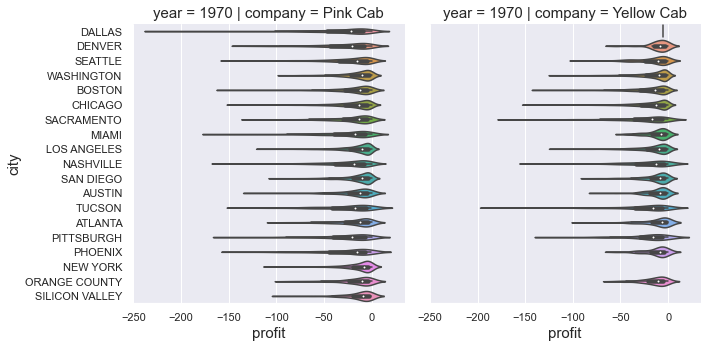

In [125]:
sns.catplot(y = 'city', x = 'profit', col = 'company', data = loss, kind = 'violin', row = 'year');

Although both companies has trips that did not make a profit, trips made my  Pink Cab  across all cities for all three years has had a higher frequency of losses compared to  Yellow Cab . These losses could affect the overall profit margin of  Pink Cab

At what time-line was the most total losses made by both companies?

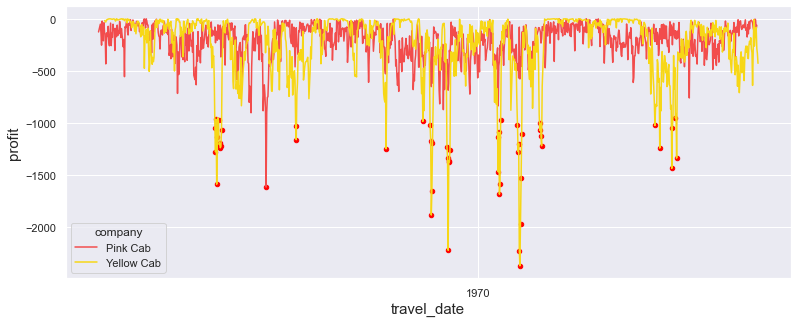

In [126]:
total_loss = loss.groupby(['travel_date', 'company']).sum()['profit'].sort_values().reset_index()

plt.figure(figsize = (13,5))

ax = sns.lineplot(x = 'travel_date', y = 'profit', data = total_loss, hue = 'company', 
             hue_order = ['Pink Cab', 'Yellow Cab'], palette = palette);

total_loss.loc[:50, ["travel_date", "profit"]].plot.scatter("travel_date", "profit", 
                                                            color = 'red', ax = ax);

The above plot shows a time-line of trips that only made losses which is aggregated at a daily level by summing up the losses. Here,  Yellow Cab  has had a series of total losses every year. What's apparent is a pattern. There are a few cluster of losses during certain time periods at particular months, most apparent during the months of July and August.

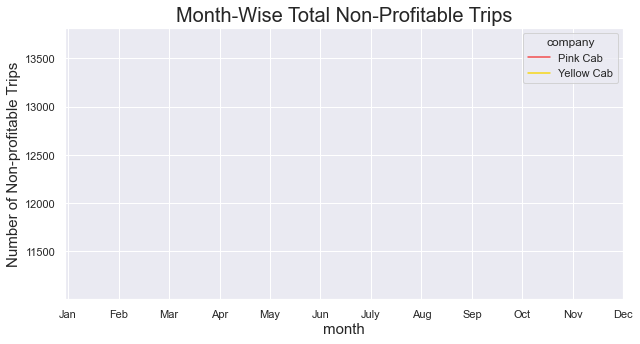

In [127]:
month_loss_count = loss.groupby(['month', 'company']).size().reset_index().\
                                                        rename(columns = {0:'count'})

plt.figure(figsize = (10,5))
sns.lineplot(x = 'month', y = 'count', hue = 'company', data = month_loss_count, 
             palette = palette);

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(np.arange(1,13,1), labels = months);
plt.ylabel('Number of Non-profitable Trips');
plt.title("Month-Wise Total Non-Profitable Trips");

From the above plot, we can deduce that  Yellow Cab  makes the highest non-profitable trips during the months of July, August, November and December. For  Pink Cab , it is during September and October.

I will test the hypothesis if losses differs across months.

In [128]:
loss_month_profit = loss[['month', 'profit']]
loss_month_profit

month   profit
10          1 -27.2620
11          1 -77.9320
12          1 -21.5360
34          1  -0.4550
389         1 -52.4750
...       ...      ...
359335      1 -12.5120
359336      1 -51.4856
359338      1  -8.7832
359340      1 -39.7120
359386      1 -33.7308

[24823 rows x 2 columns]

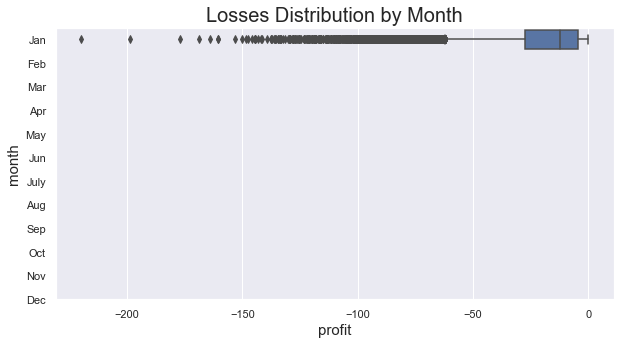

In [129]:
plt.figure(figsize = (10,5));
ax = sns.boxplot(y = 'month', x = 'profit', data = loss_month_profit, orient = 'h').\
set_title("Losses Distribution by Month");

plt.yticks(np.arange(0,12,1), labels = months);

The distribution of losses are all skewed across all months. The above plot does not follow the assumptions of an ANOVA one-way test as the distribution is skewed. Therefore I will employ a non-parametric test called 'Kruskal-Wallis H-test'. It is a non-parametric version of ANOVA.

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal.

Therefore, I will employ this test to check whether any associations exists between month and losses made.

In [130]:
#creating arrays of profit(losses) for each month

jan = loss_month_profit.query('month == 1')['profit'].values
feb = loss_month_profit.query('month == 2')['profit'].values
mar = loss_month_profit.query('month == 3')['profit'].values
apr = loss_month_profit.query('month == 4')['profit'].values
may = loss_month_profit.query('month == 5')['profit'].values
jun = loss_month_profit.query('month == 6')['profit'].values
jul = loss_month_profit.query('month == 7')['profit'].values
aug = loss_month_profit.query('month == 8')['profit'].values
sep = loss_month_profit.query('month == 9')['profit'].values
octr = loss_month_profit.query('month == 10')['profit'].values
nov = loss_month_profit.query('month == 11')['profit'].values
dec = loss_month_profit.query('month == 12')['profit'].values

* Null hypothesis: Monthly profit medians are equal (no variation in means of groups).
H0: m1=m2=…=mp


* Alternative hypothesis: At least one monthly profit median is different from other months.
H1: All μ are not equal

In [132]:
from scipy import stats

alpha = 0.05
H, p = stats.kruskal(jan, feb, mar, apr, may, jun, jul, aug, sep, octr, nov, dec)

print(f'H-Value: {H:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.01

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: nan
P-value: nan

P-value higher than alpha - Cannot Reject H0


The above tests signifies that the median losses differs across months and that losses are higher during some particular months.

In which city does both companies makes most bad trips?

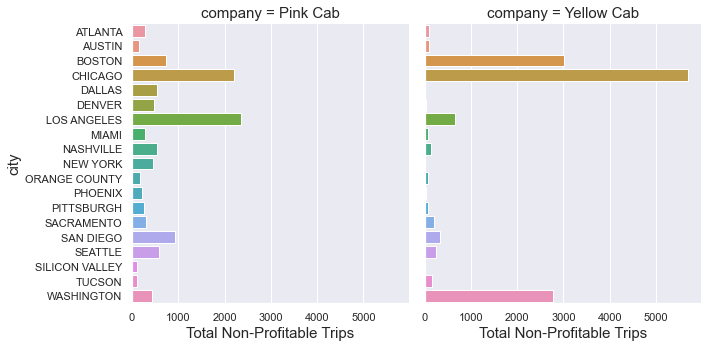

In [133]:
loss_city = loss.groupby(['city', 'company']).size().reset_index().rename(columns = {0:'count'})

g = sns.catplot(y = 'city', x = 'count', col = 'company', data = loss_city, kind = 'bar');

g.set_xlabels("Total Non-Profitable Trips");

According to the data, the most number of non-profit trips made by  Yellow Cab  was on Chicago, Boston, Washington and Los Angeles. For  Pink Cab , its mostly on Chicago and Los Angeles.

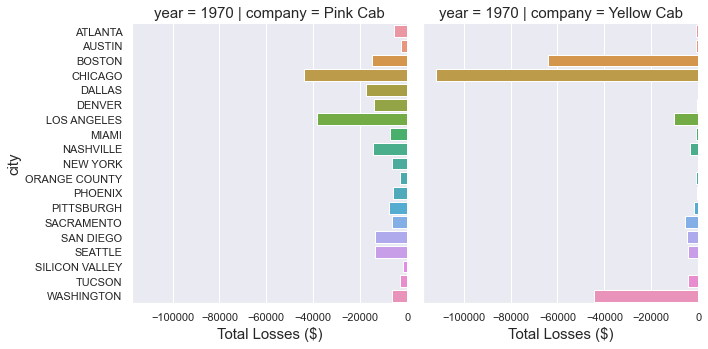

In [134]:
loss_year_city = loss.groupby(['year', 'city', 'company']).sum()['profit'].reset_index()

g = sns.catplot(y = 'city', x = 'profit', col = 'company', row = 'year', data = loss_year_city, 
                kind = 'bar');

g.set_xlabels("Total Losses ($)");

For  Yellow Cab , losses made from non-profit trips was the highest on Chicago during 2017. For  Pink Cab , it was on Los Angeles during 2017.

How much does the monthly Cab Fare, Cab expenses and profit vary across all states for both Cab companies?

In [135]:
#Grouping by year, month, state and company and taking the median of Cab fare and expenses

#I take the median, as the distribution of both profit and price charged in heavily skewed to the right.

cab_monthly_finances = full_df.groupby(['year', 'month', 'state', 'company']).\
median()[['price_charged', 'cost_of_trip', 'profit']].reset_index()

#Concatenating year and month into a single column
cab_monthly_finances['month_level'] = cab_monthly_finances['year'].astype('str') + "-" + \
                                                cab_monthly_finances['month'].astype('str')

#dropping individual year and month column
cab_monthly_finances.drop(['year', 'month'], axis = 1, inplace = True)

#unpivoting price charge and cost of trip in order to make it easier to plot both in a single axis
cab_monthly_finances = cab_monthly_finances.melt(id_vars = ['state', 'company', 'month_level'], 
                                                 var_name = 'inc_exp', value_name = 'amount')

cab_monthly_finances

state     company month_level        inc_exp    amount
0     AZ    Pink Cab      1970-1  price_charged  283.7800
1     AZ  Yellow Cab      1970-1  price_charged  379.7400
2     CA    Pink Cab      1970-1  price_charged  300.2000
3     CA  Yellow Cab      1970-1  price_charged  404.9000
4     CO    Pink Cab      1970-1  price_charged  268.4950
..   ...         ...         ...            ...       ...
73    TN  Yellow Cab      1970-1         profit   50.3016
74    TX    Pink Cab      1970-1         profit   33.5735
75    TX  Yellow Cab      1970-1         profit  135.5660
76    WA    Pink Cab      1970-1         profit   26.8390
77    WA  Yellow Cab      1970-1         profit   69.8232

[78 rows x 5 columns]

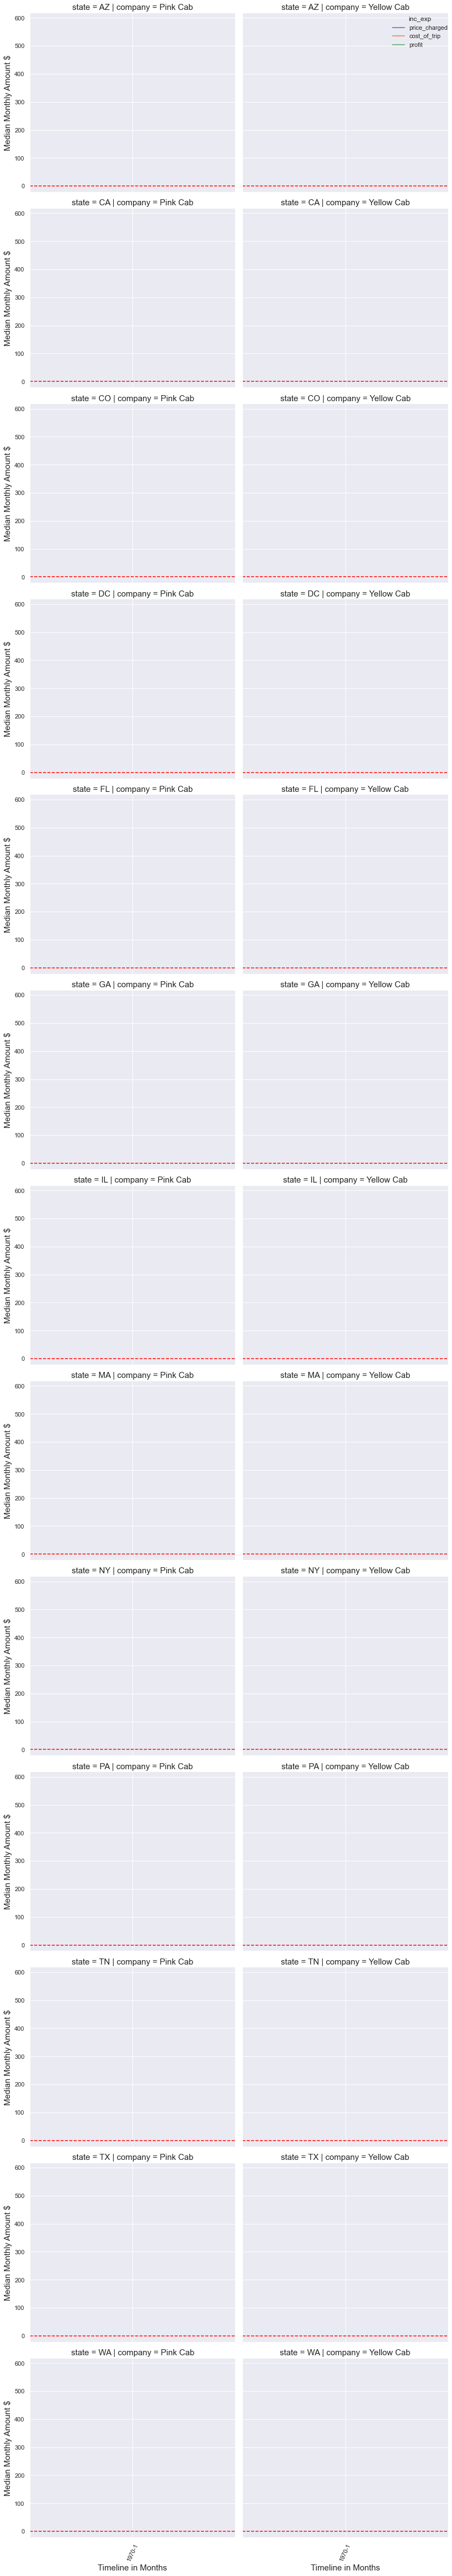

In [136]:
g = sns.relplot(y = 'amount', x = 'month_level', data = cab_monthly_finances, kind = 'line', 
                hue = 'inc_exp', row = 'state', col = 'company');

axes = g.axes.flatten()

for ax in axes:
    ax.axhline(0, ls='--', color='red') #to mark profit below zero

g.set_xticklabels(rotation=65);
plt.tight_layout();

g.set_ylabels("Median Monthly Amount $");
g.set_xlabels("Timeline in Months");
g._legend.set_bbox_to_anchor((0.99, 0.985))

The above plots represents the monthly median Cab fares and Cab expenses for both companies across all states. The  blue line  represents the average  price charged  for the trips and the  orange line  represents the  cab expenses .  green line  represents the  profit . The  red line  marks the border where any amount (mainly  profit ) below zero is  losses . These are my observations:

Across all states,  Yellow Cab  has higher  cab expenses  compared to  Pink Cab .

In general,  Pink Cab  has lower  price charged  compared to  Yellow Cab . This is especially discernible in the state of New York.

Like  price charged ,  profit  for  Yellow Cab  is higher than it's rival. Both  price charged  and  profit  follows the same pattern.

For the state of New York, which has the highest Cab passengers compared to any other states,  Yellow Cab  has the highest Cab Fares compared to  Pink Cab  during the same time-line.  Yellow Cab's   profit  is significantly higher in New York compared to any other state.

There is an interesting pattern for the state of PA (Pennsylvania). During February 2018, both Cab fares and Cab expenses of  Pink Cab  dipped way below the norm. At that same time period, the Cab Fares of  Yellow Cab  has shown a significant spike.

Both Cab companies makes median  losses  during time periods across all states. This is more frequent for  Pink Cab  in states such as Colorado, Florida, Georgia, Illinois, Massachusetts, Pennsylvania, Tennessee, Texas and Washington. For  Yellow Cab , there are barely any months making median  losses . This could signify that  Yellow Cab  perform better across all states and any  losses  it makes from non-profit trips will be easily offsetted by the amount of  profit  it makes.

It is important to note that for all the three variables, there is a confounding variable, which is the distance traveled (km_traveled). Perhaps binning this variable will help help in further analysis.

<span class="mark">Distance (km_travelled)</span>

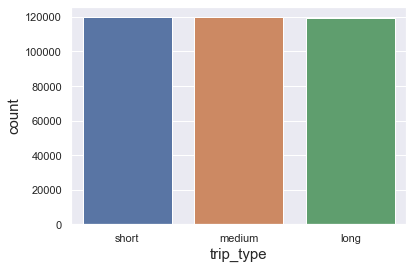

In [137]:
#Binning km_travelled in to 3 equal freq quantiles.

full_df['trip_type'] = pd.qcut(full_df.km_travelled, 3, labels = ['short', 'medium', 'long'])
#Short distance = 1.899 to 15.47 km
#medium distance = 15.47 to 29.4 km
#Short distance = 29.4 to 48.0 km

sns.countplot(full_df.trip_type);

All trip durations have equal occurrences according to the data.

How does price charged vary with different trip intervals at State level?

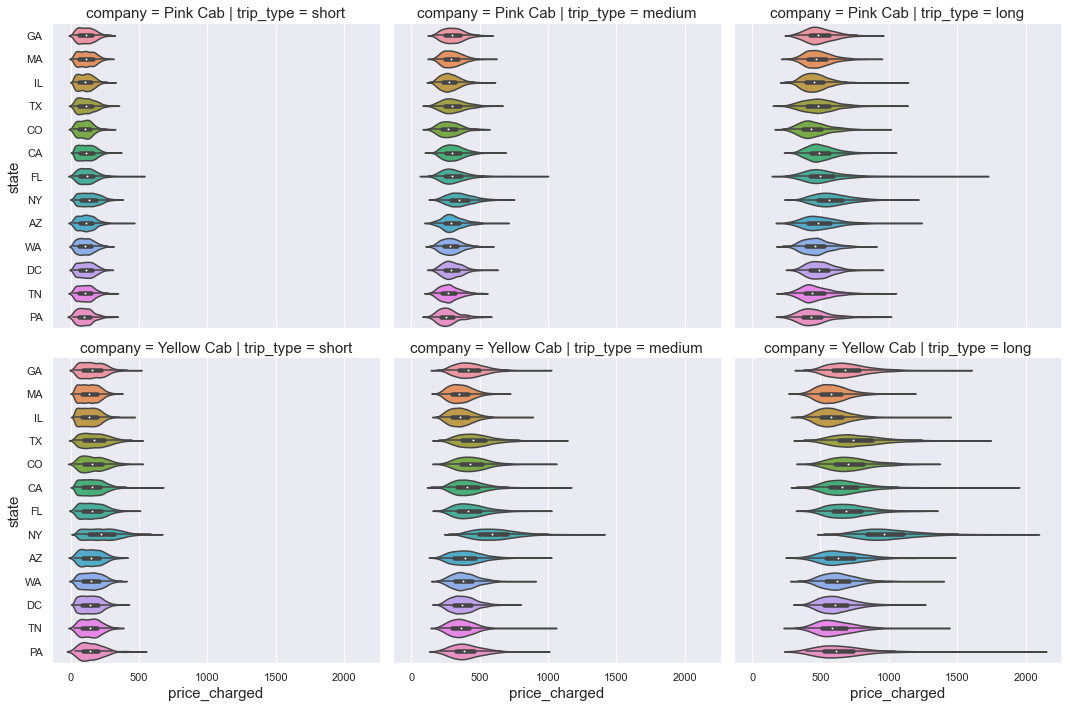

In [138]:
sns.catplot(x = 'price_charged', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

From the above plots, the price charged for short distance trips by both cab companies across all states are roughly the same, except for New York. As the distance increases, more variations in prices charged across all states is observed for  Yellow Cab . Comparatively, prices charged for a particular distance category by  Pink Cab  remains roughly the same across all states.

How does Expenses vary with different trip intervals at State level?

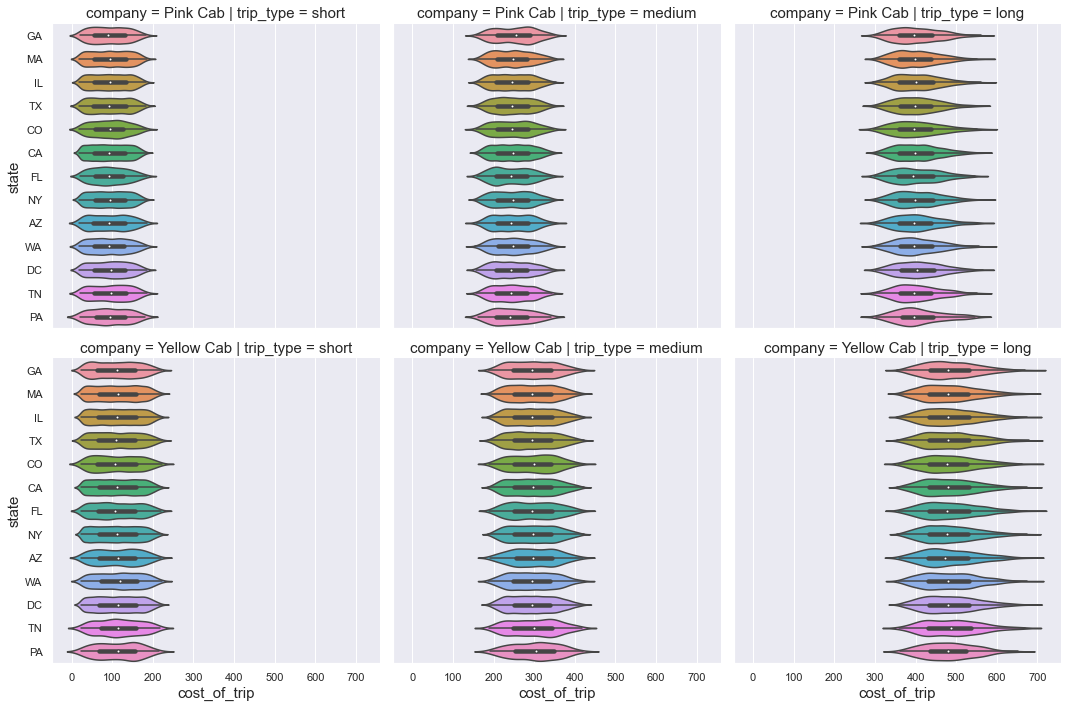

In [139]:
sns.catplot(x = 'cost_of_trip', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

Cab expenses remains uniform at different trip intervals across all states.

<span class="mark">How does profit vary with different trip intervals at State level?</span>

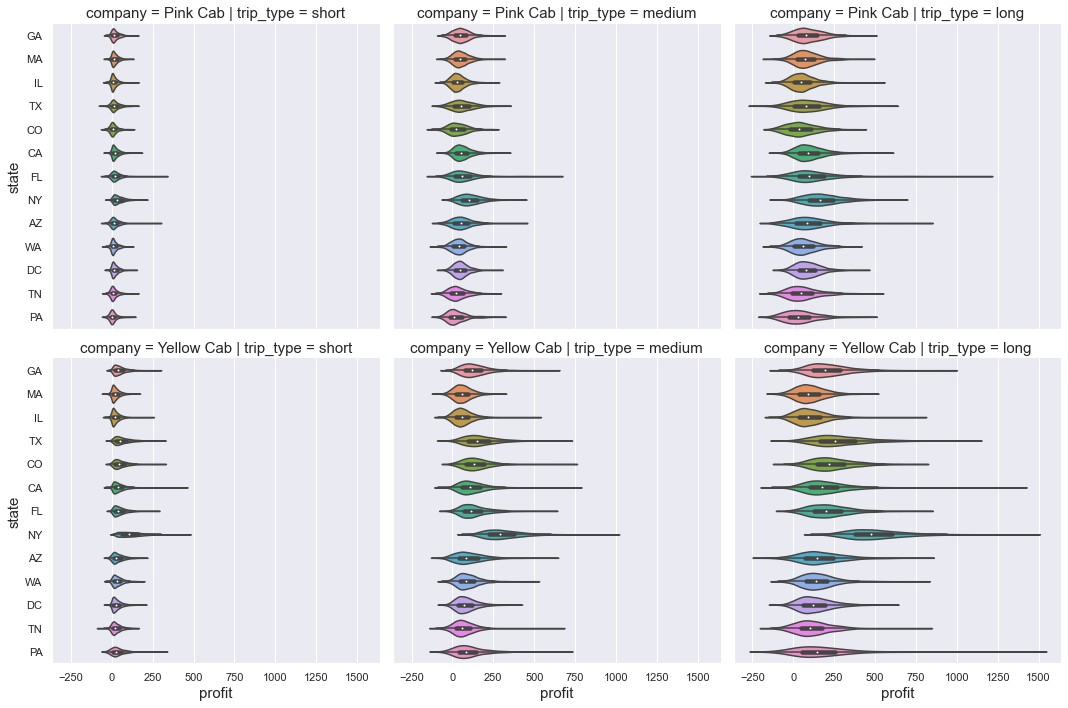

In [140]:
sns.catplot(x = 'profit', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

From the above plot, there is a higher probability of making high profits when the trip duration is long across all states.


At which distance interval most non-profit trips are made by both companies?

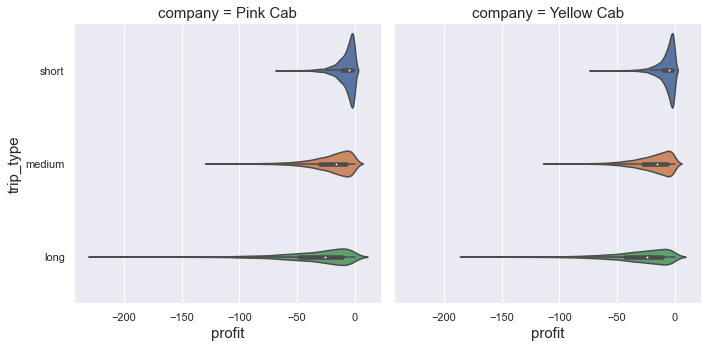

In [141]:
loss_dist = full_df.query("profit < 0")[['profit', 'company', 'trip_type']]

g = sns.catplot(x = 'profit', y = 'trip_type', col = 'company', data = loss_dist, kind = 'violin');

For both Cab companies, short trips results in higher frequency of losses. Losses made during medium trips are roughly the same for both. For long trips, although the frequency is less compared to other two intervals, there is a small probability to make higher losses.  Pink Cab  has has trips with the highest losses compared to it's rival.

<div class="mark">
How does Distance affect the price, costs and profit?</div><i class="fa fa-lightbulb-o "></i>

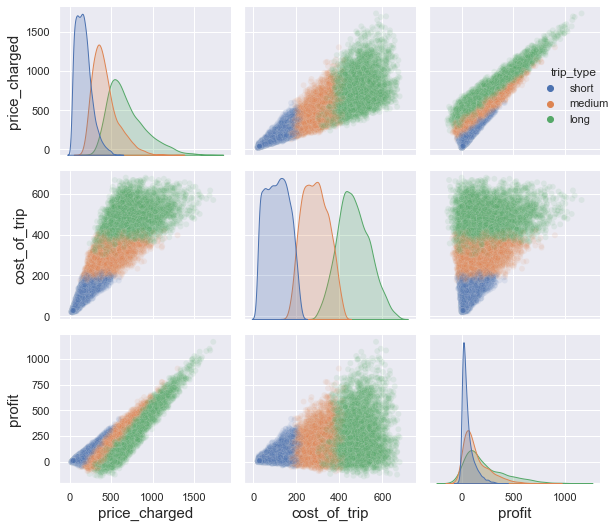

In [142]:
sampled_df_2 = full_df[['price_charged', 'cost_of_trip', 'profit', 'trip_type']].\
sample(frac = 0.05, random_state=42)

g = sns.pairplot(sampled_df_2, hue = 'trip_type', plot_kws={'alpha': 0.1});

g._legend.set_bbox_to_anchor((1, 0.8))
plt.tight_layout();

The above plots depicts at each distance intervals, the price, profit and costs increases, although there is a higher variability in all variables as the distance increases.

Next, I will bin profit into different levels and see it's relation with distance.

In [144]:
bins = [-221, 0.00001, 30.5, 85.5, 200.5, 800.5, 1464]
#Here, I assume where that profit = 0 is also loss.

label = ['loss', 'low', 'average', 'above-average', 'high', 'highest']

full_df['profit_level'] = pd.cut(full_df.profit, bins = bins, labels = label)

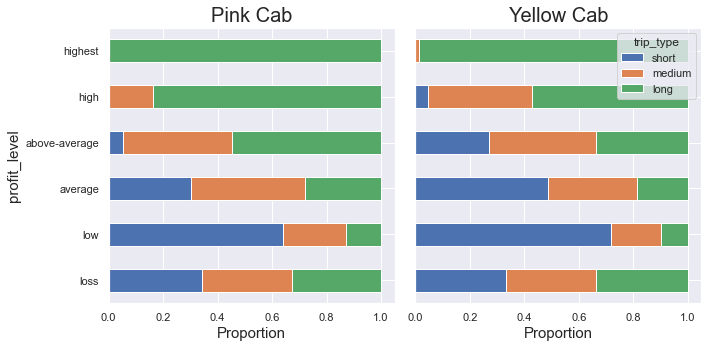

In [145]:
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True, tight_layout = True);

pd.crosstab(index = full_df.query("company == 'Pink Cab'").profit_level, 
            columns = full_df.query("company == 'Pink Cab'").trip_type, normalize = 'index').\
plot(kind = 'barh', stacked = True, ax = ax[0], title = "Pink Cab", legend = False);

ax[0].set_xlabel('Proportion');

pd.crosstab(index = full_df.query("company == 'Yellow Cab'").profit_level, 
            columns = full_df.query("company == 'Yellow Cab'").trip_type, 
            normalize = 'index').plot(kind = 'barh', stacked = True, ax = ax[1], 
                                     title = "Yellow Cab");

ax[1].set_xlabel('Proportion');

The above plots depicts proportion of trip_intervals that contributes to each profit level for both companies. For the loss category (where profit <= 0), all three trip durations have equal intervals, which could mean that distance might not be the main factor contributing to losses for both Cab companies.

Long trips contributes the most to highest profit.

What sets apart  Yellow Cab  is that it is able to make better profits from shorter trips compared to it's rival.

Is there any association between daily number of trips and trip types?

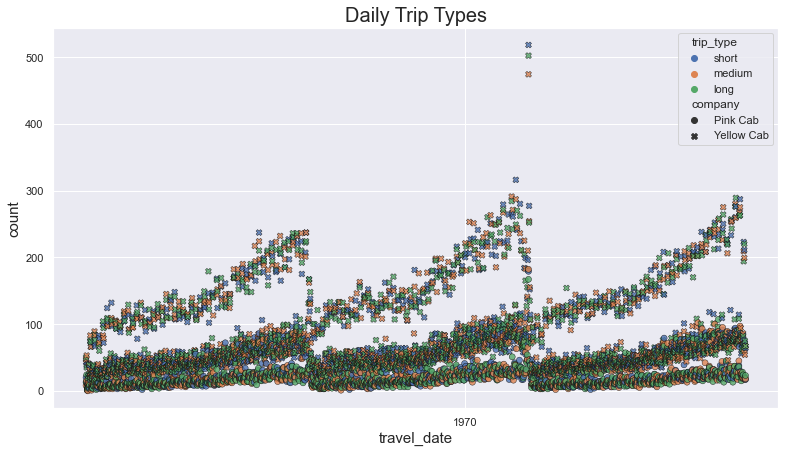

In [146]:
trip_date = full_df.groupby(['travel_date', 'company', 'trip_type']).size().reset_index().\
            rename(columns={0:'count'})

plt.figure(figsize = (13,7))
sns.scatterplot(x = 'travel_date', y = 'count', hue = 'trip_type', data = trip_date, alpha = 0.8, 
               edgecolor="black", style = 'company').set_title('Daily Trip Types');

At a daily level, there seems to be equal frequency of all trip types. No trip stands out in particular. Even on 5th Jan 2018, when the highest number of trips were made according to the data, all trip types were made on that day.

Is there any association between distance traveled and profit being at a loss?
I will use chi-squared test to test my hypothesis.

In [147]:
#Is there any association between distance travelled and profit_level being loss?

pd.crosstab(index = full_df.query("profit_level == 'loss'").profit_level, 
            columns = full_df.query("profit_level == 'loss'").trip_type)

trip_type     short  medium  long
profit_level                     
loss           8393    8186  8244

Null Hypothesis (H0): There is no association between Loss and trip_type.

Alternative hypothesis (H1): There is an association between loss and trip_type.

In [148]:
data = pd.crosstab(index = full_df.query("profit_level == 'loss'").profit_level, 
            columns = full_df.query("profit_level == 'loss'").trip_type).values

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


There is no association between profit being loss and distance traveled.

Let's also test whether any association exists between other profit levels and distance traveled. The Null hypothesis remains the same as before (except its for profit instead of loss).

In [149]:
data = pd.crosstab(index = full_df.query("profit_level != 'loss'").profit_level, 
            columns = full_df.query("profit_level != 'loss'").trip_type).values

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


# Customer Income

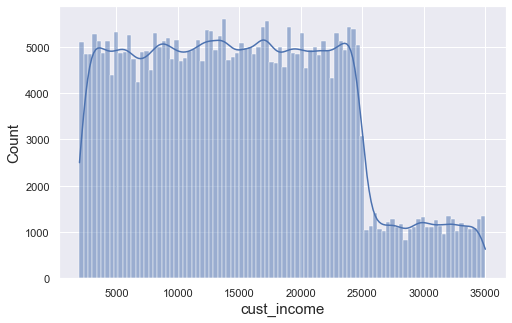

In [150]:
#Distribution of Customer Income
plt.figure(figsize = (8,5))
sns.histplot(x = 'cust_income', kde = True, data = full_df);

Just like age variable, the income of customers also follows a two-phase uniform distribution, signifying that there is an equal probability of finding customers belonging to all ranges of salary below 25000 $ and lower but yet equal probability of finding customer's of higher income range.

Is there a relation between customer's income and the number of times the customer uses a Cab service?

In [151]:
#Creating a dataset that displays customer id, customer's income and total number of times the 
#customer has made the trip.

customer_income_trip_df = full_df.groupby(['customer_id', 'cust_income']).size().\
                                                reset_index().rename(columns = {0:'count'})

customer_income_trip_df

customer_id  cust_income  count
0                1        16359     29
1                2        12069     40
2                3        12968     46
3                4        13803     26
4                5         9965     31
...            ...          ...    ...
46143        59996        16634      4
46144        59997        22352     10
46145        59998         5678      9
46146        59999        24577      8
46147        60000        20303     18

[46148 rows x 3 columns]

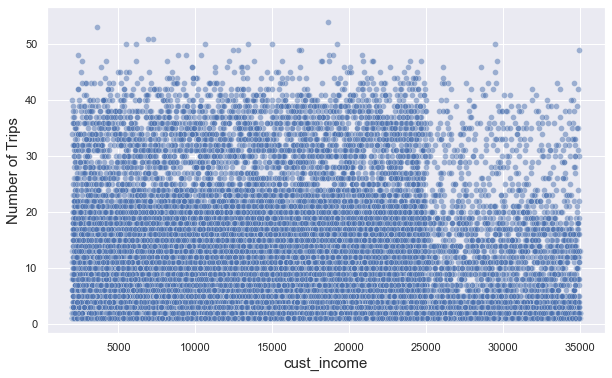

In [152]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'cust_income', y = 'count', data = customer_income_trip_df, 
               alpha = 0.5);
plt.ylabel("Number of Trips");

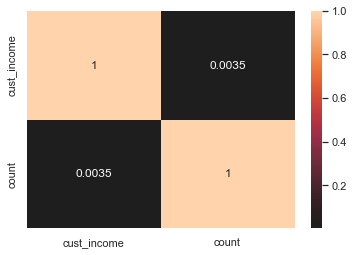

In [153]:
#Correlation using spearman as the data is not normally distributed and both variables are discrete, 
#not continuous.
sns.heatmap(customer_income_trip_df.iloc[:,1:].corr('spearman'), annot = True, center = 0);

According to the data in hand, there is absolutely no correlation between a customer's income and the number of times a customer travels using Cabs. Perhaps binning income levels help add more insights to our analysis. I have sourced income range categories from here:

In [154]:
#Binning income levels

bins = [0, 2670.5, 4451.5, 8903.5, 20030.5, 35000.5]
label = ['low', 'low-middle', 'middle', 'upper-middle', 'high']

full_df['income_levels'] = pd.cut(full_df.cust_income, bins = bins, labels = label)

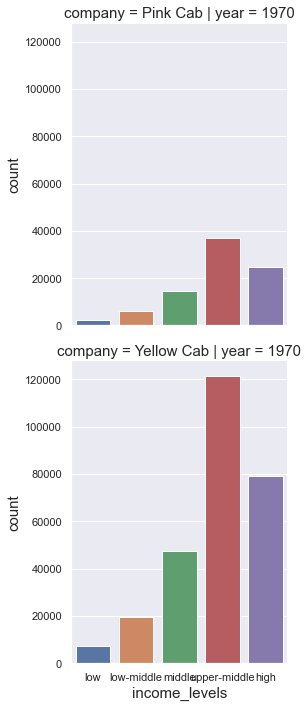

In [155]:
income_count = full_df.groupby(['year', 'company', 'income_levels']).size().reset_index().\
                                                                rename(columns = {0:'count'})

sns.catplot(x = 'income_levels', y = 'count', row = 'company', col = 'year', data = income_count, 
           kind = 'bar', aspect = 0.85);

After binning income, we can see that most of the passengers belong to upper-middle class for both Cab companies, followed by high income class.  Yellow Cab  have higher proportion of passengers. For both companies, there is a slight growth in passengers from 2016 to 2017, but then stagnated/dipped slightly below from 2017 to 2018.

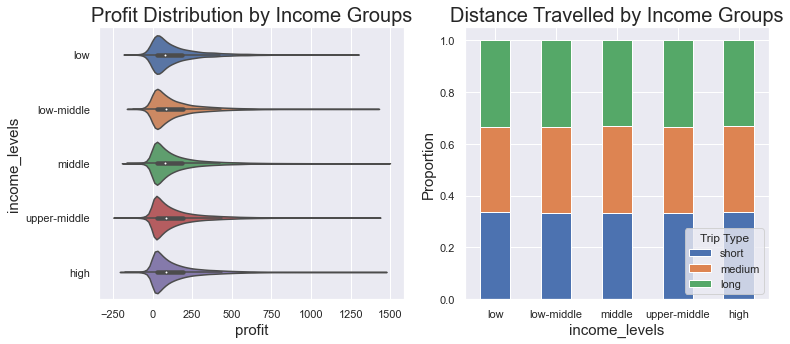

In [156]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

sns.violinplot(x = 'profit', y = 'income_levels', data = full_df, ax = ax[0]).\
                            set_title("Profit Distribution by Income Groups");

pd.crosstab(index = full_df.income_levels, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, ax = ax[1], title = "Distance Travelled by Income Groups").\
legend(loc = "lower right", title = "Trip Type");

ax[1].set_ylabel('Proportion');

Across all income groups, the distribution of profit from all income classes are the same. Similarly, customers from all income classes have equal proportion of trip durations.

In [157]:
#Null Hypothesis (H0): No association between income and distance travelled
#Alternative (H1): Association exists between these 2 variables

data = pd.crosstab(index = full_df.income_levels, columns = full_df.trip_type).values

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4276562935845216
Independent (H0 holds true)


Both the plots and statistical tests proved that distance traveled does not depend on the income level of the customer.

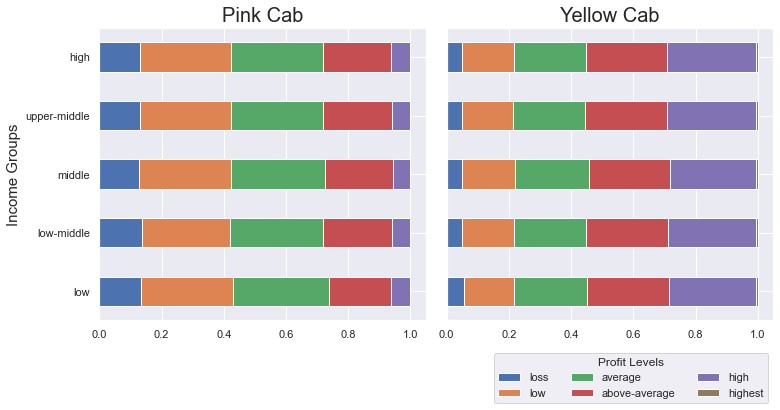

In [158]:
fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (11, 6), sharey = True)

#Pink Cab
pd.crosstab(columns = full_df.query("company == 'Pink Cab'").profit_level,
            index = full_df.query("company == 'Pink Cab'").income_levels, 
            normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Pink Cab", ylabel = "Proportion", 
                 xlabel = 'Income Groups', ax = ax[0], legend = False)

#Yellow Cab
pd.crosstab(columns = full_df.query("company == 'Yellow Cab'").profit_level, 
            index = full_df.query("company == 'Yellow Cab'").income_levels, 
            normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Yellow Cab", ylabel = "Proportion", 
                 xlabel = 'Income Groups', ax = ax[1]).\
legend(loc='lower right', bbox_to_anchor=(1.0, -0.3), ncol = 3, title = 'Profit Levels');

For both companies, the proportion of profit levels are the same for customer's of all income levels. There is no association between Customer's income and profit.

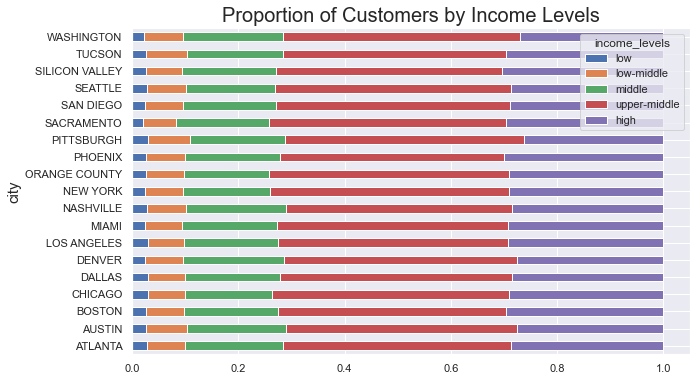

In [159]:
pd.crosstab(full_df.city, columns = full_df.income_levels, normalize = 'index').\
plot(kind = 'barh', stacked = True, figsize = (10,6), title = "Proportion of Customers by Income Levels");

All cities have similar customer distributions by income level.

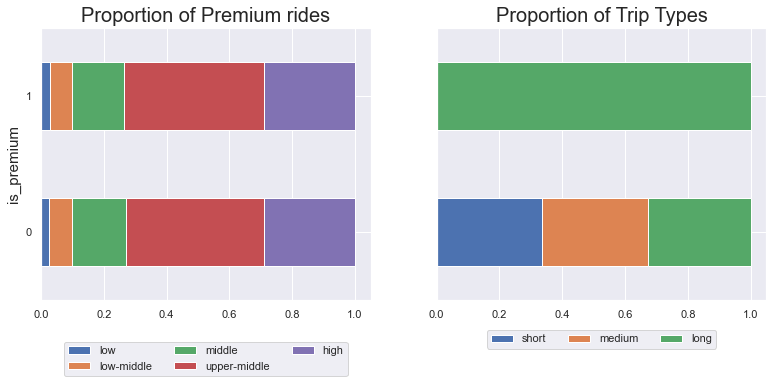

In [160]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (13,5))

pd.crosstab(index = full_df.is_premium, columns = full_df.income_levels, normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Proportion of Premium rides", ax = ax[0]).\
legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.3), ncol = 3);

pd.crosstab(index = full_df.is_premium, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Proportion of Trip Types", ax = ax[1]).\
legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.2), ncol = 3);

For the is_premum variable, again my hypothesis for the premium cabs has been proven wrong as there is no association between is_premium variable with both distance and customer's income level. Therefore, I will drop this column.

From all of the above plots, we can conclude that customer's income level don't determine the Cab companies profit or mode of operation

In [161]:
full_df.drop('is_premium', axis = 1, inplace = True)

Which Cab company has the most loyal customers?

In [162]:
loyal_cust = full_df.groupby(['customer_id', 'company']).size().reset_index().rename(columns = {0:'count'})

#identifying loyal customer's that has utilized a particular Cab company atleast 5 times.
loyal_cust['is_loyal_five'] = np.where(loyal_cust['count'] >= 5, 'Loyal', 'Not Loyal')

loyal_cust

customer_id     company  count is_loyal_five
0                1    Pink Cab      4     Not Loyal
1                1  Yellow Cab     25         Loyal
2                2    Pink Cab      4     Not Loyal
3                2  Yellow Cab     36         Loyal
4                3    Pink Cab      6         Loyal
...            ...         ...    ...           ...
72221        59998  Yellow Cab      6         Loyal
72222        59999    Pink Cab      2     Not Loyal
72223        59999  Yellow Cab      6         Loyal
72224        60000    Pink Cab      4     Not Loyal
72225        60000  Yellow Cab     14         Loyal

[72226 rows x 4 columns]

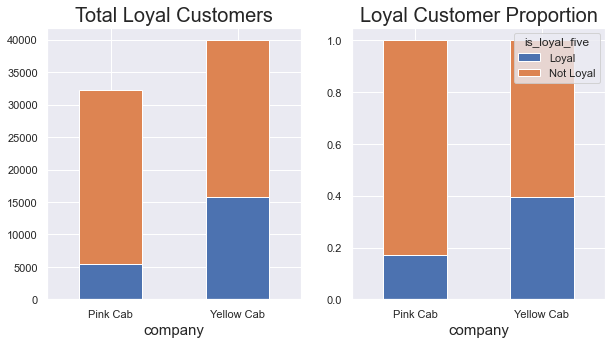

In [163]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_five).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_five, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

From the above plots, its clear that  Yellow Cab  customer's have more loyal customer's who has used the company's services at least 5 times compared to  Pink Cab  company.

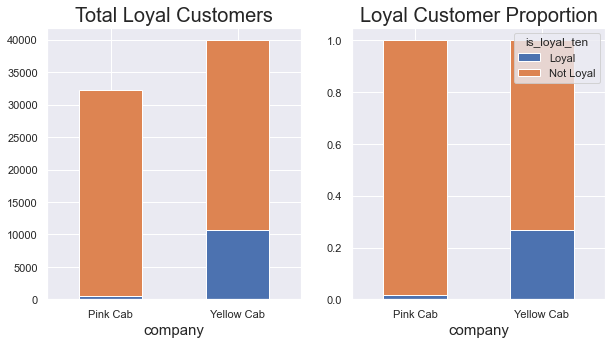

In [164]:
#identifying loyal customer's that has utilized a particular Cab company atleast 10 times.
loyal_cust['is_loyal_ten'] = np.where(loyal_cust['count'] >= 10, 'Loyal', 'Not Loyal')

fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_ten).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_ten, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

Same as before,  Yellow Cab  customer's have more loyal customer's who has used the company's services at least 10 times compared to  Pink Cab  company.

## Customer growth by year

In [165]:
#Annual Customer growth by company

yearly_cust_growth = full_df.groupby(['city', 'year', 'company']).agg({'customer_id':'nunique'}).\
                                                                                    reset_index()

yearly_cust_growth

city  year     company  customer_id
0          ATLANTA  1970    Pink Cab         1322
1          ATLANTA  1970  Yellow Cab         2595
2           AUSTIN  1970    Pink Cab         1354
3           AUSTIN  1970  Yellow Cab         1914
4           BOSTON  1970    Pink Cab         2463
5           BOSTON  1970  Yellow Cab         2997
6          CHICAGO  1970    Pink Cab         2859
7          CHICAGO  1970  Yellow Cab         3000
8           DALLAS  1970    Pink Cab         1118
9           DALLAS  1970  Yellow Cab         2564
10          DENVER  1970    Pink Cab         1145
11          DENVER  1970  Yellow Cab         1681
12     LOS ANGELES  1970    Pink Cab         2996
13     LOS ANGELES  1970  Yellow Cab         2998
14           MIAMI  1970    Pink Cab         1480
15           MIAMI  1970  Yellow Cab         2334
16       NASHVILLE  1970    Pink Cab         1356
17       NASHVILLE  1970  Yellow Cab          965
18        NEW YORK  1970    Pink Cab         2972
19        NEW YORK  1970  Yellow Cab         3000
20   ORANGE COUNTY  1970    Pink Cab         1198
21   ORANGE COUNTY  1970  Yellow Cab         1712
22         PHOENIX  1970    Pink Cab          763
23         PHOENIX  1970  Yellow Cab          994
24      PITTSBURGH  1970    Pink Cab          604
25      PITTSBURGH  1970  Yellow Cab          574
26      SACRAMENTO  1970    Pink Cab         1078
27      SACRAMENTO  1970  Yellow Cab          880
28       SAN DIEGO  1970    Pink Cab         2909
29       SAN DIEGO  1970  Yellow Cab         2886
30         SEATTLE  1970    Pink Cab         1790
31         SEATTLE  1970  Yellow Cab         2486
32  SILICON VALLEY  1970    Pink Cab         2130
33  SILICON VALLEY  1970  Yellow Cab         2382
34          TUCSON  1970    Pink Cab          684
35          TUCSON  1970  Yellow Cab          934
36      WASHINGTON  1970    Pink Cab         2109
37      WASHINGTON  1970  Yellow Cab         3000

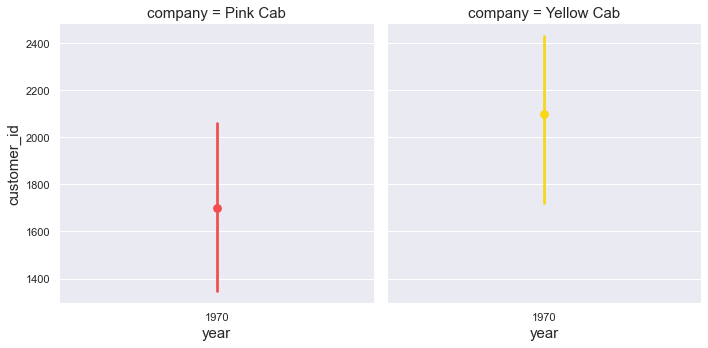

In [166]:
sns.catplot(y = 'customer_id', x = 'year', col = 'company', data = yearly_cust_growth, 
           kind = 'point', hue = 'company', palette = palette);

There was a slight growth of customer's from 2016 to 2017 but then lowered slightly from 2017 to 2018.

Preferred Payment Mode by Customers

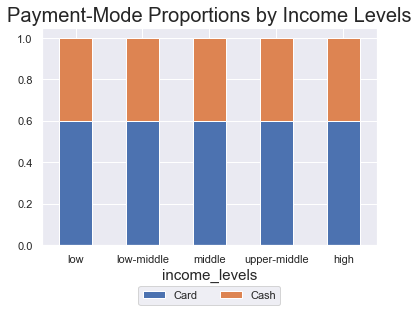

In [167]:
pd.crosstab(index = full_df.income_levels, columns = full_df.payment_mode, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Payment-Mode Proportions by Income Levels").\
legend(loc = "lower center", ncol = 2, bbox_to_anchor=(0.5, -0.3));

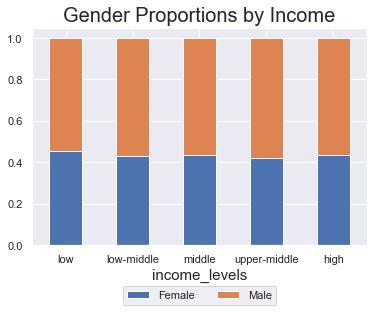

In [168]:
pd.crosstab(columns = full_df.gender, index = full_df.income_levels, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Gender Proportions by Income").\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));

## Age

The age distribution of the passengers in the dataset follows a two-phase uniform distribution. According to the data, the highest number of passengers are between the age groups of 18 to 40 year olds. Older passengers above 40 until 65 still make up a sizable portion of passengers.

In [169]:
full_df['age_level'] = pd.qcut(full_df.age, 5, 
                               labels = ['early_20s', 'late_20s', 'early_30s', 'middle_age', 'senior'])

# early_20s: 17.999 to 24.0 
# late_20s: 24.0 to 30.0 
# early_30s: 30.0 to 36.0 
# middle_age: 36.0 to 47.0
# senior : 47.0 to 65.0

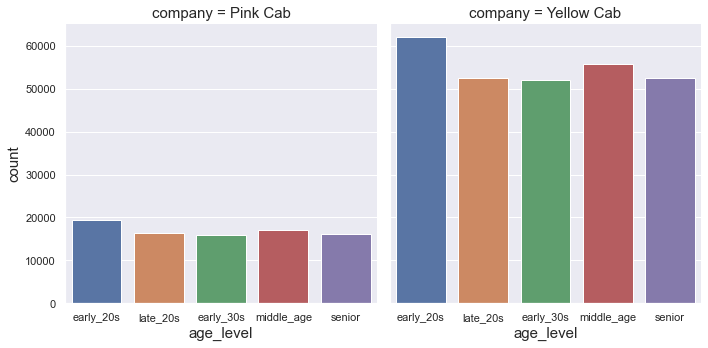

In [170]:
sns.catplot(x = 'age_level', col = 'company', data = full_df, kind = 'count');

<span class="mark">Yellow Cab</span>  have higher number of customers, but the distribution of customers on an age level are the same for both companies.

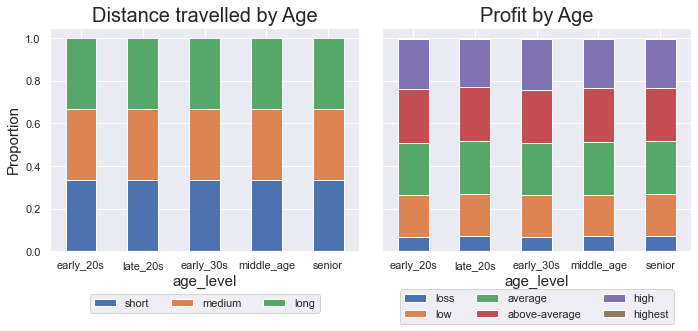

In [171]:
fig, ax = plt.subplots(1,2, figsize = (10,5), tight_layout = True, sharey = True)

pd.crosstab(index = full_df.age_level, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Distance travelled by Age", 
     ylabel = "Proportion", ax = ax[0]).\
legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3), ncol = 3);

pd.crosstab(index = full_df.age_level, columns = full_df.profit_level, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Profit by Age", ax = ax[1]).\
legend(loc = "lower center", bbox_to_anchor = (0.5,-0.35), ncol = 3);

Customer's age doesn't seem to have any affect on both Distance traveled and Profit as the proportions remains the same across all age levels.

## Market Share

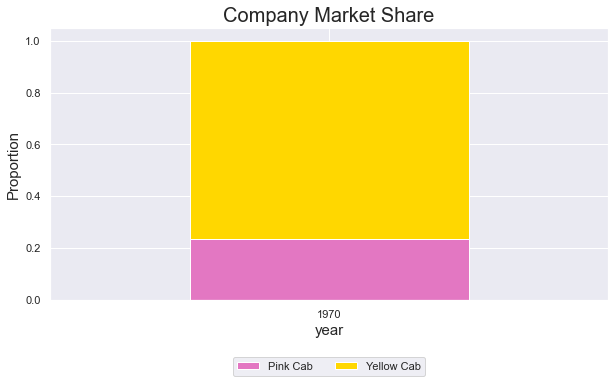

In [172]:
#MArket Share by company

pd.crosstab(index = full_df.year, columns = full_df.company, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = 'Company Market Share', color = ['tab:pink', 'gold'], 
    figsize = (10, 5), ylabel = 'Proportion').\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));

KeyError: 'Pink Cab'

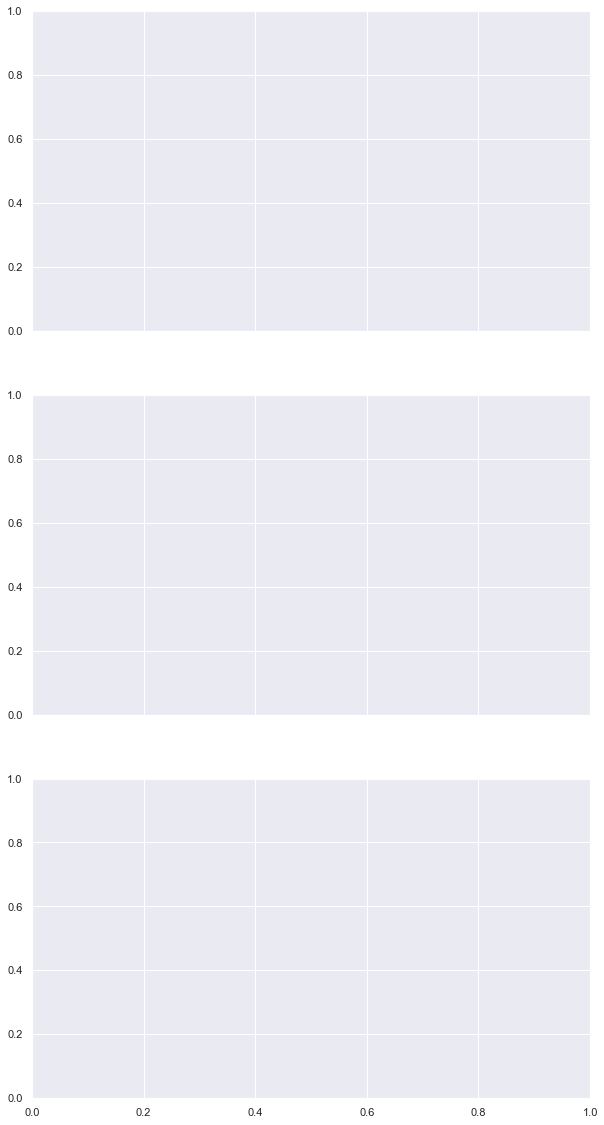

In [174]:
fig, axes = plt.subplots(3,1, sharex = True, figsize = (10,20))

for year, ax in zip([2016, 2017, 2018], axes.flatten()):
    temp_df = full_df.query(f'year == {year}')
    pd.crosstab(index=temp_df.city, columns=temp_df.company, normalize='index').sort_values('Pink Cab').\
    plot(kind = 'barh', stacked = True, ax = ax, title = f"{year} Market Share", 
        color = ['tab:pink', 'gold']).\
    legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3))
    
    ax.axvline(0.5, ls = '--', color = 'k', alpha = 0.7)
    
plt.xlabel("Proportion");
plt.xticks(np.arange(0.0, 1.1, 0.1));

Across all the years, the market share for each company has not changed much.

<span class="mark">Yellow Cab</span>  has the highest market share across majority of the cities.

Does <span class="girk">price_charged</span> vary by Gender?

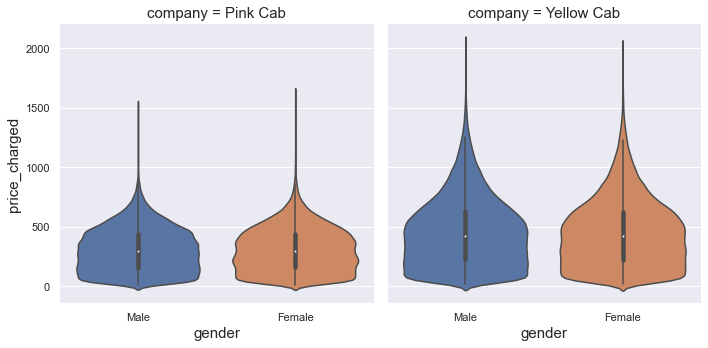

In [175]:
sns.catplot(x = 'gender', y = 'price_charged', data = full_df, col = 'company', kind = 'violin');

For both cab companies, the median price_charged for both gender's are very similar. Therefore there is no relation between price_charged and gender.

# conclusion

After analyzing all the variables in the dataset, here is a summary of my analysis:

Both Cab company's financial performance is mainly based on profit. Profit is derived from the difference of the price charged and cost of trip for each trip. Both of these variables are highly correlated with the distance traveled for each trip. And the total distance traveled in a day is positively correlated with total number of daily trips.

There is weekly, monthly and quarterly seasonality on the number of rides in a given time period. The number of cab rides are higher during December and at their lowest during February.

<span class="mark">Yellow Cab</span>  has higher coverage on cities and has higher loyal customers compared to  Pink Cab . Moreover,  <span class="mark">Yellow Cab</span>  seems to perform well almost on all cities and is able to make significantly higher profits compared to it's rival.
In conclusion, we can measure a company's performance by looking at the total number of daily trips.

In the next section, I will include extra datasets with the full dataset to see other factors that can affect both company's mode of operations.